<a href="https://colab.research.google.com/github/venuannamdas/E_clean_AI/blob/master/capstone_version1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Title of the Project:** "AI-Driven Eco-Friendly Email Management for Enhanced Productivity in the Automotive Industry"

**Objectives**:

Efficient Email Classification: Develop an email classification system capable of categorizing emails into the following categories:

> Time Waste: Identify emails containing promotional material, irrelevant information, spam, or those marking the end of a conversation as time-wasting.

> Reply: Recognize emails that already contain a reply.

> Required Response: Identify emails that require a response and contain important information, marking them as threads that need attention.



Priority-Based Email Ranking: Create an email ranking system that organizes emails based on the presence of urgency keywords from the urgency list in the email subject. Priority should be given to emails with urgency indicators.

Recommendation System: Implement a recommendation system that suggests appropriate actions for handling emails based on their classification and the presence of urgency keywords in the subject. Prioritize actions for David Woon, Director at Continental-NTU Corporate Lab, while also customizing recommendations based on urgency for other employees in the organization.

Email Content Analysis: Develop the capability to analyze the content of emails, extracting insights and key information for David Woon and other employees. Ensure that the urgency level and email classification influence the analysis and prioritization of emails.

Customized AI Algorithms: Tailor AI algorithms not only to the specific needs and preferences of David Woon but also to those of different employees within the organization. Recognize the hierarchical structure of users, with David Woon at a higher level, to provide personalized email management solutions.

By achieving these objectives, our project aims to enhance email communication efficiency, cater to David Woon's needs by prioritizing his emails based on urgency keywords in the subject, and customize the email management system to accommodate urgency preferences for other employees within Continental Automotive. This approach will streamline email workflows and ensure that critical emails receive immediate attention, contributing to a more efficient and responsive communication environment.






(Title:Motivation for the Project: Clean and Green Singapore https://www.cgs.gov.sg/)

**Problem Statement:**

Dr. David Woon, the Director at Continental Automotive Singapore, faces a formidable email management challenge that not only impacts his personal productivity but also carries the potential for significant organizational costs if left unaddressed. The central issues are as follows:

Dr. David Woon contends with an overwhelming influx of daily emails, impeding his ability to manage and prioritize effectively.

The absence of a structured system for categorizing emails results in confusion and inefficiency in handling correspondence.

There is a lack of a systematic approach to prioritize emails based on urgency, leading to delays in addressing critical matters.

The current email management approach consumes a substantial amount of Dr. Woon's daily work hours, estimated at approximately 150 minutes.

If unmitigated, this email management problem has the potential to scale across the organization, impacting the productivity and efficiency of other employees within Continental Automotive Singapore.

This project aims to develop an Email Assistant that primarily addresses Dr. David Woon's email management challenges. However, it is designed to be adaptable, allowing customization to suit the preferences and needs of other users within the company. By providing an efficient and responsive email management solution, the project seeks to enhance productivity, reduce costs, and optimize email communication within Continental Automotive Singapore.

**Business Goals:**

Enhance Dr. David Woon's Email Management Efficiency.

Establish a Robust Email Categorization System, distinguishing between 'Reply,' 'Response Required,' and 'Time Waste.'

Streamline Email Management to Decrease Time Spent on Emails while Ensuring Effective Communication.

Empower Dr. Woon with Actionable Insights to Facilitate Informed Prioritization of Emails.

Mitigate Potential Organizational Costs Arising from Email Inefficiencies, ensuring scalability for a larger workforce.

References:

https://www.demandsage.com/how-many-emails-are-sent-per-day/

https://earthweb.com/how-many-emails-does-the-average-person-receive-per-day/#:~:text=billion%20by%202023.-,2.,by%20an%20average%20office%20worker

https://www.slicktext.com/blog/2019/06/survey-workplace-communication-statistics/#:~:text=Almost%20half%20(45.6%25)%20of,some%20emails%20in%20their%20inbox

https://www.digitalinformationworld.com/2023/01/people-spend-33-less-time-reading.html#:~:text=Back%20in%202018%2C%20studies%20showed,considered%20and%20taken%20into%20account

https://hbr.org/2019/01/how-to-spend-way-less-time-on-email-every-day#:~:text=The%20average%20professional%20spends%2028,120%20messages%20received%20per%20day

https://hbr.org/2019/01/how-to-spend-way-less-time-on-email-every-day#:~:text=The%20average%20professional%20spends%2028,120%20messages%20received%20per%20day

In [7]:
pip install geopandas matplotlib


In [115]:
import numpy as np
import pandas as pd
import xlrd
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
import re
import gensim
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, f1_score,accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer,TfidfTransformer

from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC,LinearSVC

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


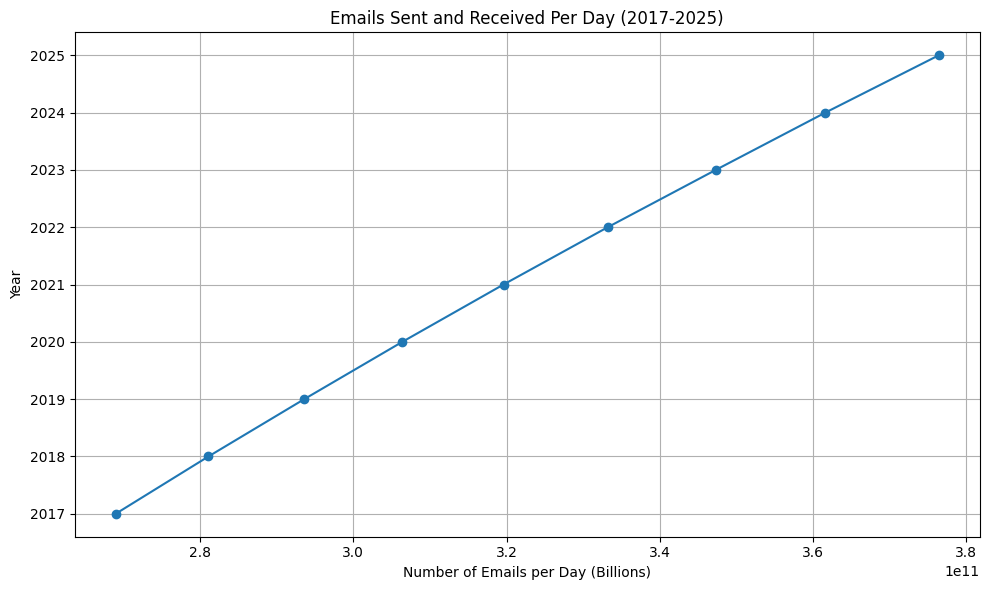

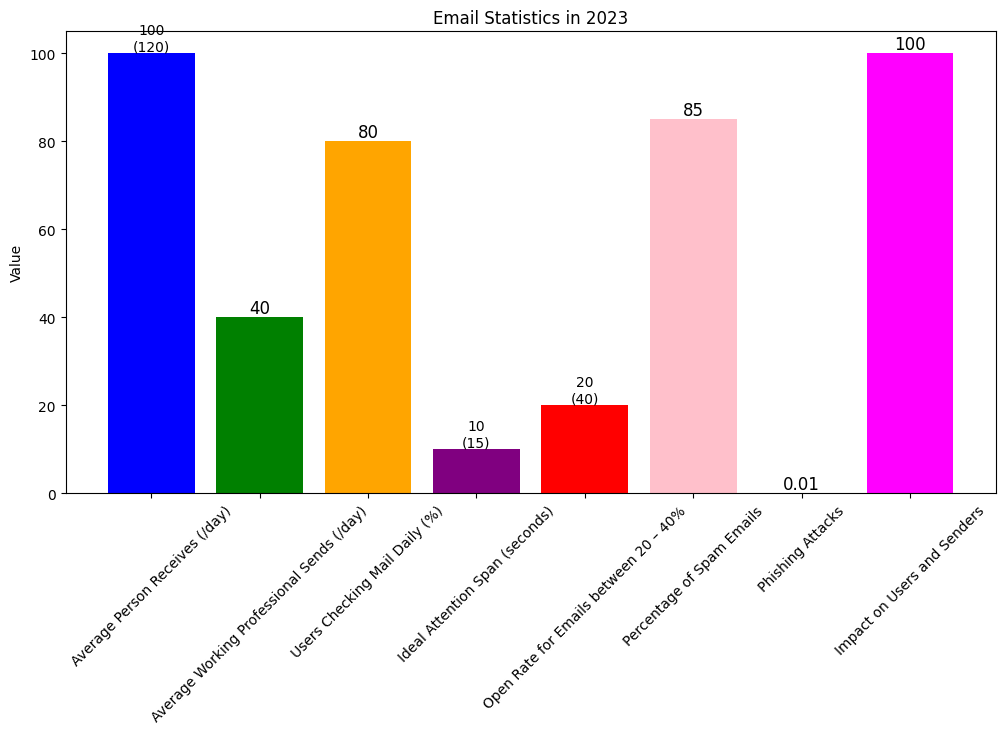

In [8]:


# Data for the first subplot (plot1)
years = [2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025]
emails_per_day = [269e9, 281.1e9, 293.6e9, 306.4e9, 319.6e9, 333.2e9, 347.3e9, 361.6e9, 376.4e9]

# Create a figure with 1 subplot
plt.figure(figsize=(10, 6))

# First subplot (plot1)
plt.plot(emails_per_day, years, marker='o', linestyle='-')
plt.title('Emails Sent and Received Per Day (2017-2025)')
plt.xlabel('Number of Emails per Day (Billions)')
plt.ylabel('Year')
plt.grid(True)

# Show the figure for Figure 1 ("plot1")
plt.tight_layout()
plt.show()



# Data for the second subplot (2)
categories2 = [
    "Average Person Receives (/day)",
    "Average Working Professional Sends (/day)",
    "Users Checking Mail Daily (%)",
    "Ideal Attention Span (seconds)",
    "Open Rate for Emails between 20 – 40%",
    "Percentage of Spam Emails",
    "Phishing Attacks",
    "Impact on Users and Senders",
]

values2 = [
    (100, 120),
    40,
    80,
    (10, 15),
    (20, 40),
    85,
    1 / 99,
    100,
]

colors2 = ['blue', 'green', 'orange', 'purple', 'red', 'pink', 'cyan', 'magenta', 'brown', 'gray']

# Create a figure with 1 subplot (plot 2)
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the second subplot (plot 2)
bars = ax.bar(categories2, [round(value, 2) if not isinstance(value, tuple) else round(value[0], 2) for value in values2], color=colors2)
ax.set_title('Email Statistics in 2023')
ax.set_ylabel('Value')
ax.tick_params(axis='x', rotation=45, labelbottom=True)

# Annotate the values on the bars for the second subplot
for bar, value in zip(bars, values2):
    if isinstance(value, tuple):
        ax.text(bar.get_x() + bar.get_width() / 2, value[0], f"{round(value[0], 2)}\n({round(value[1], 2)})", ha='center', va='bottom', fontsize=10)
    else:
        ax.text(bar.get_x() + bar.get_width() / 2, value, round(value, 2), ha='center', va='bottom', fontsize=12)

# Show the figure with the second subplot (plot 2) only
plt.show()


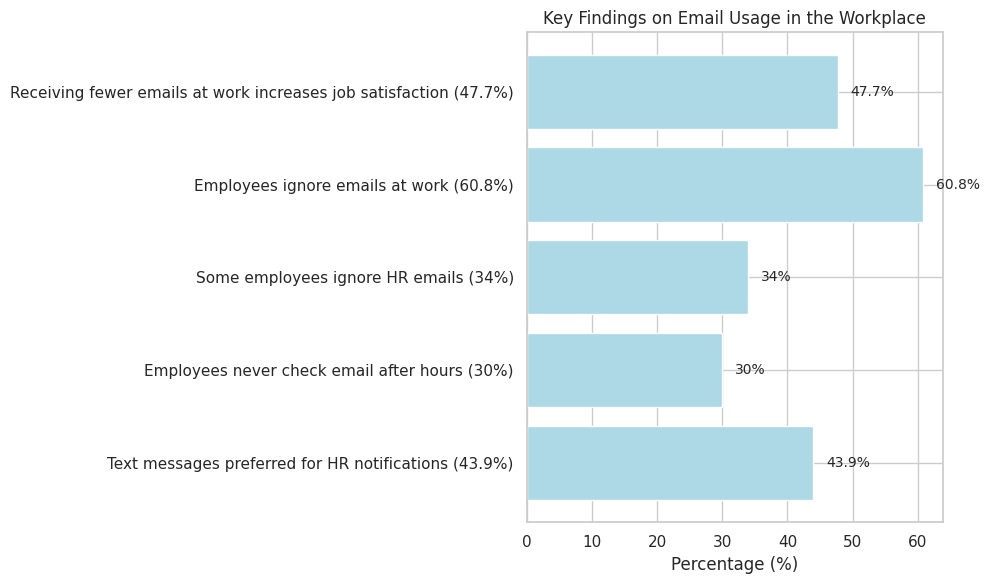

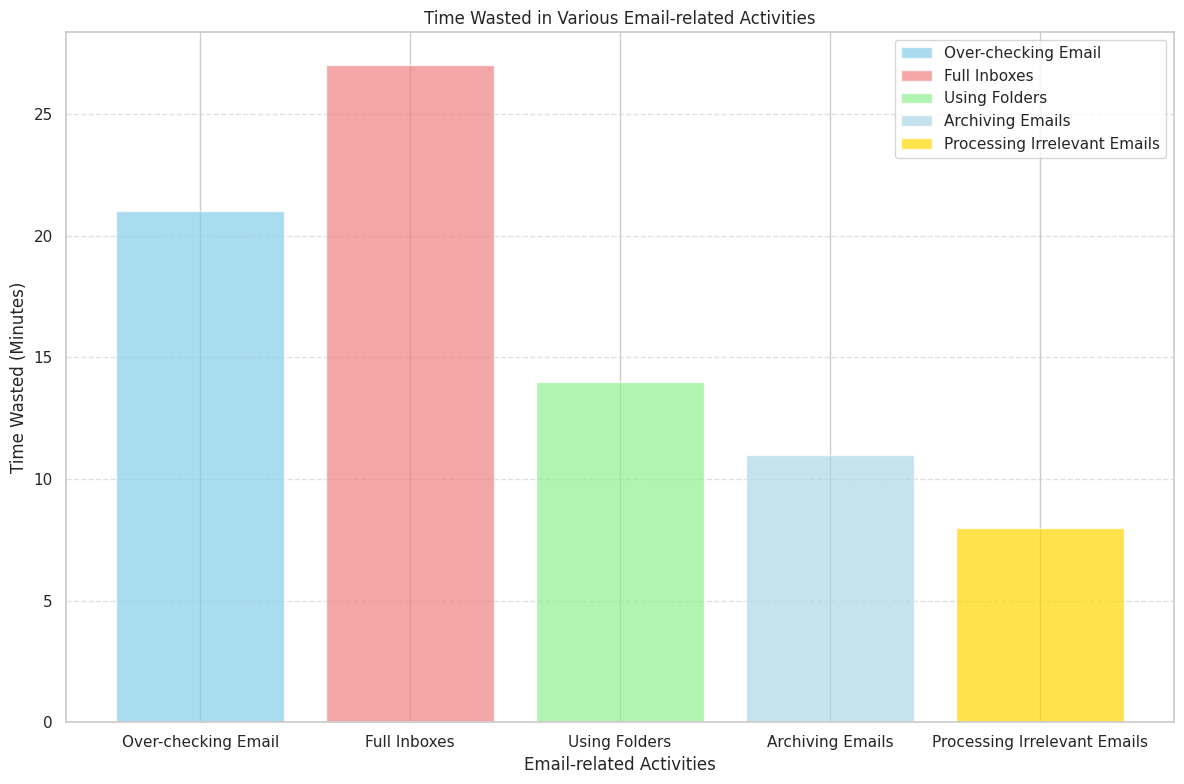

In [164]:
# Key findings data
findings = [
    "Receiving fewer emails at work increases job satisfaction (47.7%)",
    "Employees ignore emails at work (60.8%)",
    "Some employees ignore HR emails (34%)",
    "Employees never check email after hours (30%)",
    "Text messages preferred for HR notifications (43.9%)"
]

# Corresponding percentages
percentages = [47.7, 60.8, 34, 30, 43.9]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.barh(findings, percentages, color='lightblue')

# Adding labels and title
plt.xlabel('Percentage (%)')
plt.title('Key Findings on Email Usage in the Workplace')

# Adding data labels
for i, percentage in enumerate(percentages):
    plt.text(percentage + 2, i, f'{percentage}%', va='center', fontsize=10)

# Show the plot
plt.gca().invert_yaxis()  # Invert the y-axis for better readability
plt.tight_layout()
plt.show()


#---------------------------------

# Data for time wasted in different email-related activities (in minutes per day)
time_wasted_over_checking = 21
time_wasted_full_inboxes = 27
time_wasted_using_folders = 14
time_wasted_archiving_emails = 11
time_wasted_processing_irrelevant = 8

# Create a combined histogram
plt.figure(figsize=(12, 8))

# Plot each activity's time wasted as a bar
plt.bar('Over-checking Email', time_wasted_over_checking, color='skyblue', alpha=0.7, label='Over-checking Email')
plt.bar('Full Inboxes', time_wasted_full_inboxes, color='lightcoral', alpha=0.7, label='Full Inboxes')
plt.bar('Using Folders', time_wasted_using_folders, color='lightgreen', alpha=0.7, label='Using Folders')
plt.bar('Archiving Emails', time_wasted_archiving_emails, color='lightblue', alpha=0.7, label='Archiving Emails')
plt.bar('Processing Irrelevant Emails', time_wasted_processing_irrelevant, color='gold', alpha=0.7, label='Processing Irrelevant Emails')

# Add labels and title
plt.xlabel('Email-related Activities')
plt.ylabel('Time Wasted (Minutes)')
plt.title('Time Wasted in Various Email-related Activities')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()



In [10]:
import folium
import pandas as pd
import random

# Set a random seed for repeatability
random.seed(42)

# Example data for 42 countries by population (40 random + Malaysia + Singapore)
data_country = {
    1: 'China', 2: 'India', 3: 'United States', 4: 'Indonesia', 5: 'Pakistan', 6: 'Brazil', 7: 'Nigeria', 8: 'Bangladesh',
    9: 'Russia', 10: 'Mexico', 11: 'Japan', 12: 'Ethiopia', 13: 'Philippines', 14: 'Egypt', 15: 'Vietnam', 16: 'DR Congo',
    17: 'Turkey', 18: 'Iran', 19: 'Germany', 20: 'Thailand', 21: 'United Kingdom', 22: 'France', 23: 'Italy',
    24: 'South Africa', 25: 'Myanmar', 26: 'South Korea', 27: 'Colombia', 28: 'Spain', 29: 'Ukraine', 30: 'Tanzania',
    31: 'Argentina', 32: 'Kenya', 33: 'Poland', 34: 'Algeria', 35: 'Canada', 36: 'Uganda', 37: 'Morocco', 38: 'Iraq',
    39: 'Sudan', 40: 'Peru', 41: 'Malaysia', 42: 'Singapore'
}

data_latitude = {
    1: 35.8617, 2: 20.5937, 3: 37.0902, 4: -6.2088, 5: 30.3753, 6: -14.235, 7: 9.082, 8: 23.685, 9: 61.524,
    10: 23.6345, 11: 36.2048, 12: 9.145, 13: 12.8797, 14: 26.8206, 15: 14.0583, 16: -4.0383, 17: 38.9637, 18: 32.4279,
    19: 51.1657, 20: 15.8700, 21: 51.509865, 22: 48.856613, 23: 41.902782, 24: -30.559482, 25: 21.916221, 26: 35.907757,
    27: 37.566535, 28: 40.730610, 29: 4.710989, 30: -6.369028, 31: -34.6118, 32: -1.286389, 33: 51.9194, 34: 28.0339,
    35: 56.1304, 36: 1.3733, 37: 32.2903, 38: 33.3152, 39: 15.5524, 40: -9.1900, 41: 3.1390, 42: 1.3521
}

data_longitude = {
    1: 104.1954, 2: 78.9629, 3: -95.7129, 4: 106.8456, 5: 69.3451, 6: -51.9253, 7: 7.4951, 8: 90.3563, 9: 105.3188,
    10: -102.5528, 11: 138.2529, 12: 40.4897, 13: 121.7740, 14: 30.8025, 15: 108.2772, 16: 21.7587, 17: 35.2433,
    18: 53.6880, 19: 10.4515, 20: 100.9925, 21: -0.118092, 22: 2.352222, 23: 12.496365, 24: 25.559397, 25: 95.955974,
    26: 126.978413, 27: -122.419416, 28: -74.006111, 29: -3.717017, 30: 31.042871, 31: -58.4173, 32: 36.8219,
    33: 19.1451, 34: -106.8317, 35: -106.3468, 36: 32.2903, 37: -7.5965, 38: 44.3081, 39: 28.1850, 40: -75.0152,
    41: 101.6865, 42: 103.8198
}

data_population = {
    1: 18441, 2: 18380, 3: 7031, 4: 6273, 5: 2225, 6: 2213, 7: 4211, 8: 1166, 9: 2846, 10: 2126, 11: 6526, 12: 1201, 13: 6130,
    14: 2103, 15: 4997, 16: 2987, 17: 4384, 18: 6284, 19: 12000, 20: 9183, 21: 9000, 22: 9567, 23: 9900, 24: 9900, 25: 9120, 26: 4000,
    27: 1200, 28: 2000, 29: 7100, 30: 5020, 31: 2530, 32: 1240, 33: 7500, 34: 1766, 35: 2750, 36: 1800, 37: 1350, 38: 1350,
    39: 1400, 40: 2000, 41: 4200, 42: 2200
}
# Calculate cost of wastage based on population and allocated employees
cost_per_minute_wasted = 0.04  # Cost per minute wasted in dollars (10 cents)

# Calculate wastage in hours per day and total wastage cost per day
wastage_per_minute_per_employee = 150  # 150 minutes are wasted per employee in a day
wastage_per_day_per_employee = 150
total_wastage_cost_per_day = wastage_per_day_per_employee * sum(data_population.values()) * cost_per_minute_wasted

# Create DataFrames for data
df = pd.DataFrame({
    'Country': list(data_country.values()),
    'Latitude': list(data_latitude.values()),
    'Longitude': list(data_longitude.values()),
    'Population': list(data_population.values()),
    'Employee Population': list(data_population.values())
})

# Calculate the 'Total Wastage Cost per Day' column
df['Total Wastage Cost per Day'] = wastage_per_minute_per_employee * df['Employee Population'] * cost_per_minute_wasted

# Initialize the map at a global scale
m = folium.Map(location=[20, 0], zoom_start=2)
# Iterate through the DataFrame and add markers with detailed pop-up information
for i, row in df.iterrows():
    popup_html = f"<b>Country:</b> {row['Country']}<br>"
    popup_html += f"<b>Employee Population:</b> {row['Employee Population']}<br>"
    popup_html += f"<b>Total Salary per Day:</b> ${(row['Total Wastage Cost per Day'])*(100/31.25):.2f}<br>"
    popup_html += f"<b>Total Wastage Cost per Day:</b> ${row['Total Wastage Cost per Day']:.2f}<br>"

    # Add the marker with the updated pop-up information
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=folium.Popup(popup_html, max_width=300),
    ).add_to(m)

# Display the map
m.save('employee_wastage_map.html')


In [11]:
total_population_in_company = sum(data_population.values())
print("Total Emp Population:", total_population_in_company)

Total Emp Population: 217600


In [12]:
total_wastage_cost_per_day = wastage_per_day_per_employee * sum(data_population.values()) * cost_per_minute_wasted
print("Total Wastage Cost per Day for All Countries:", total_wastage_cost_per_day)


Total Wastage Cost per Day for All Countries: 1305600.0


it is around 31.25% salary a day, salary perday Million $417.792000

In [13]:
import geopandas as gpd
import pandas as pd
import random
import matplotlib.pyplot as plt

# Set a random seed for repeatability
random.seed(42)

# Example data for 42 countries by population (40 random + Malaysia + Singapore)
data_country = {
    1: 'China', 2: 'India', 3: 'United States', 4: 'Indonesia', 5: 'Pakistan', 6: 'Brazil', 7: 'Nigeria', 8: 'Bangladesh',
    9: 'Russia', 10: 'Mexico', 11: 'Japan', 12: 'Ethiopia', 13: 'Philippines', 14: 'Egypt', 15: 'Vietnam', 16: 'DR Congo',
    17: 'Turkey', 18: 'Iran', 19: 'Germany', 20: 'Thailand', 21: 'United Kingdom', 22: 'France', 23: 'Italy',
    24: 'South Africa', 25: 'Myanmar', 26: 'South Korea', 27: 'Colombia', 28: 'Spain', 29: 'Ukraine', 30: 'Tanzania',
    31: 'Argentina', 32: 'Kenya', 33: 'Poland', 34: 'Algeria', 35: 'Canada', 36: 'Uganda', 37: 'Morocco', 38: 'Iraq',
    39: 'Sudan', 40: 'Peru', 41: 'Malaysia', 42: 'Singapore'
}

data_latitude = {
    1: 35.8617, 2: 20.5937, 3: 37.0902, 4: -6.2088, 5: 30.3753, 6: -14.235, 7: 9.082, 8: 23.685, 9: 61.524,
    10: 23.6345, 11: 36.2048, 12: 9.145, 13: 12.8797, 14: 26.8206, 15: 14.0583, 16: -4.0383, 17: 38.9637, 18: 32.4279,
    19: 51.1657, 20: 15.8700, 21: 51.509865, 22: 48.856613, 23: 41.902782, 24: -30.559482, 25: 21.916221, 26: 35.907757,
    27: 37.566535, 28: 40.730610, 29: 4.710989, 30: -6.369028, 31: -34.6118, 32: -1.286389, 33: 51.9194, 34: 28.0339,
    35: 56.1304, 36: 1.3733, 37: 32.2903, 38: 33.3152, 39: 15.5524, 40: -9.1900, 41: 3.1390, 42: 1.3521
}

data_longitude = {
    1: 104.1954, 2: 78.9629, 3: -95.7129, 4: 106.8456, 5: 69.3451, 6: -51.9253, 7: 7.4951, 8: 90.3563, 9: 105.3188,
    10: -102.5528, 11: 138.2529, 12: 40.4897, 13: 121.7740, 14: 30.8025, 15: 108.2772, 16: 21.7587, 17: 35.2433,
    18: 53.6880, 19: 10.4515, 20: 100.9925, 21: -0.118092, 22: 2.352222, 23: 12.496365, 24: 25.559397, 25: 95.955974,
    26: 126.978413, 27: -122.419416, 28: -74.006111, 29: -3.717017, 30: 31.042871, 31: -58.4173, 32: 36.8219,
    33: 19.1451, 34: -106.8317, 35: -106.3468, 36: 32.2903, 37: -7.5965, 38: 44.3081, 39: 28.1850, 40: -75.0152,
    41: 101.6865, 42: 103.8198
}

data_population = {
    1: 18441, 2: 18380, 3: 7031, 4: 6273, 5: 2225, 6: 2213, 7: 4211, 8: 1166, 9: 2846, 10: 2126, 11: 6526, 12: 1201, 13: 6130,
    14: 2103, 15: 4997, 16: 2987, 17: 4384, 18: 6284, 19: 12000, 20: 9183, 21: 9000, 22: 9567, 23: 9900, 24: 9900, 25: 9120, 26: 4000,
    27: 1200, 28: 2000, 29: 7100, 30: 5020, 31: 2530, 32: 1240, 33: 7500, 34: 1766, 35: 2750, 36: 1800, 37: 1350, 38: 1350,
    39: 1400, 40: 2000, 41: 4200, 42: 2200
}

# Calculate cost of wastage based on population and allocated employees
cost_per_minute_wasted = 0.04  # Cost per minute wasted in dollars (4 cents)

# Calculate wastage in hours per day and total wastage cost per day
wastage_per_minute_per_employee = 150  # 150 minutes are wasted per employee in a day
wastage_per_day_per_employee = 150
total_wastage_cost_per_day = wastage_per_day_per_employee * sum(data_population.values()) * cost_per_minute_wasted
# Create a GeoDataFrame
gdf = gpd.GeoDataFrame({
    'Country': list(data_country.values()),
    'Latitude': list(data_latitude.values()),
    'Longitude': list(data_longitude.values()),
    'Population': list(data_population.values()),
    'Employee Population': list(data_population.values()),
    'Total Wastage Cost per Day': (wastage_per_minute_per_employee) * df['Employee Population'] * cost_per_minute_wasted
})

# Set the geometry of the GeoDataFrame to Point based on latitude and longitude
gdf['geometry'] = gpd.points_from_xy(gdf['Longitude'], gdf['Latitude'])



# Convert the GeoDataFrame to a DataFrame as requested
df_details = gdf[['Country', 'Employee Population', 'Total Wastage Cost per Day']]
print(df_details)



           Country  Employee Population  Total Wastage Cost per Day
0            China                18441                    110646.0
1            India                18380                    110280.0
2    United States                 7031                     42186.0
3        Indonesia                 6273                     37638.0
4         Pakistan                 2225                     13350.0
5           Brazil                 2213                     13278.0
6          Nigeria                 4211                     25266.0
7       Bangladesh                 1166                      6996.0
8           Russia                 2846                     17076.0
9           Mexico                 2126                     12756.0
10           Japan                 6526                     39156.0
11        Ethiopia                 1201                      7206.0
12     Philippines                 6130                     36780.0
13           Egypt                 2103         

<ipython-input-13-b9f8eb895368>:61: FutureWarning: You are adding a column named 'geometry' to a GeoDataFrame constructed without an active geometry column. Currently, this automatically sets the active geometry column to 'geometry' but in the future that will no longer happen. Instead, either provide geometry to the GeoDataFrame constructor (GeoDataFrame(... geometry=GeoSeries()) or use `set_geometry('geometry')` to explicitly set the active geometry column.
  gdf['geometry'] = gpd.points_from_xy(gdf['Longitude'], gdf['Latitude'])


Dataset Sources:
(basic)
https://www.kaggle.com/datasets/wcukierski/enron-email-dataset

Modified: https://github.com/venuannamdas/E_clean_AI/blob/master/preparatory.ipynb

In [14]:
#load libraries
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Bussiness context

1. Global Email Growth, statistics and Individual consumer statistics

2. Global statistics and Individual consumer statistics

5. Emails-influencing individuals and there is need for AI to help them

Business Requirements:

Consumers nowadays can easily access email from mobile phones, desktops, and tablets. This presents a challenge and an opportunity for marketers to have their emails read and opened. The ability to engage with email subscribers through concise messaging will set them apart from the competition.

Bold doomsday predictions have declared that email is dead. Yet if one considers the number of email users, then it’s safe to say that it’s very much thriving. Though hampered by pandemic-related challenges, adjustments made by marketers will help get the industry back on track.

 300 minutes are spend on daily usage by each user, that amounts to 5 Hrs a day which could be enormous wastage interms of not just the time, money but also health. It can alter sleeping patterns of individuals.

 Thus, we need  AI to understand the mailbox of individuals and organizations and assit them in reducing time of reading, reply and segregating. Hence this capstone project looks into emailbox of one individual and scans through his email dataset.

https://financesonline.com/email-statistics/

Import Libraries

In [16]:
pip install networkx matplotlib graphviz

In [117]:
pip install faker

In [118]:
import pandas as pd
import numpy as np
import pandas as pd
import xlrd
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
import re
import gensim
import seaborn as sns



import random
from faker import Faker
import networkx as nx
import pandas as pd
import networkx as nx
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict
import networkx as nx
import matplotlib.pyplot as plt
from graphviz import Digraph


from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, f1_score,accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer,TfidfTransformer

from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC,LinearSVC

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [18]:
#Load the dataframe

In [19]:
conti_df = pd.read_csv('https://raw.githubusercontent.com/venuannamdas/E_clean_AI/master/smartcontinental.csv',index_col=None,header=0)
conti_df.Date_list = conti_df.Date_list.str.replace(',','')
print(conti_df.shape)

(9571, 7)


In [20]:
conti_df.head(2)

To_list                        From_list  \
0   david.woon@smartcontinental.com  david.woon@smartcontinental.com   
1  carlos.sole@smartcontinental.com  david.woon@smartcontinental.com   

             Date_list                                       subject_list  \
0  2001-12-28 13:38:16  ["davidw (Non-Privileged).pst\n\n15:37:55 Sync...   
1  2001-11-27 05:18:10  ['davidw (Non-Privileged).pst\n\nDid you read ...   

                                               Title       Label  \
0                                ynchronization Log:  time_waste   
1  Re: FW: NYTimes.com Article: smartcontinental ...  time_waste   

                                       file  
0   ./maildir/david-w/time_wasted_items/36.  
1  ./maildir/david-w/time_wasted_items/166.

In [21]:
conti_df['Label'].value_counts()

required_response    4957
reply                4435
time_waste            179
Name: Label, dtype: int64

The dataframe comprises of basic email-box content with columns as given above. I was tasked to understand the Dependent output/target variable and features/inputs which are independent.

Let us first look at output colum, which is 'Label'. i need to develop an email classification system capable of categorizing emails into the following categories:

Time Waste: Identify emails containing promotional material, irrelevant information, spam, or those marking the end of a conversation as time-wasting.

Reply: Recognize emails that already contain a reply.

Required Response: Identify emails that require a response and contain important information, marking them as threads that need attention.

Reply: Recognize emails that already contain a reply.

REPLACE    reply with SENT for convenience

In [22]:
# Replace 'reply' with 'Sent' in the 'Label' column
conti_df['Label'] = conti_df['Label'].replace('reply', 'Sent')


In [23]:
conti_df.shape

(9571, 7)

In [24]:
conti_df['Label'].value_counts()

required_response    4957
Sent                 4435
time_waste            179
Name: Label, dtype: int64

Client requested for having several labels reflecting  emails from his boss Mr. Vincent Wong, and Sub-ordinate Dr. Shravan Kumar.  following codes will include these requirements.

In [25]:
# Use the sample function to select 1251 random observations
random_indices = np.random.choice(conti_df.index, size=1251, replace=False)

# Create a new DataFrame with the same structure as conti_df but with the modified values
modified_df = conti_df.copy()

# Change the email address for the randomly selected original rows
modified_df.loc[random_indices, 'From_list'] = 'Vincent.Wong@smartcontinental.com'

# Add "_BOSS" to the existing labels for the randomly selected original rows
modified_df.loc[random_indices, 'Label'] = modified_df.loc[random_indices, 'Label'] + "_BOSS"

# Update the original DataFrame (conti_df) with the modified values
conti_df.loc[random_indices] = modified_df.loc[random_indices]

# Reset the index to avoid any index issues
conti_df.reset_index(drop=True, inplace=True)

In [26]:
# Identify rows where 'Label' is 'Sent' or 'required_response'
mask = (conti_df['Label'] == 'Sent') | (conti_df['Label'] == 'required_response')

# Use the sample function to select 999 random observations from the filtered rows
random_indices = np.random.choice(conti_df[mask].index, size=999, replace=False)

# Create a new DataFrame with the same structure as conti_df but with the modified values
modified_df = conti_df.copy()

# Change the email address for the randomly selected original rows
modified_df.loc[random_indices, 'From_list'] = 'Shravan.Kumar@smartcontinental.com'

# Add "_SUB" to the existing labels for the randomly selected original rows
modified_df.loc[random_indices, 'Label'] = modified_df.loc[random_indices, 'Label'] + "_SUB"

# Update the original DataFrame (conti_df) with the modified values for the selected rows
conti_df.update(modified_df, overwrite=True)

# Reset the index to avoid any index issues
conti_df.reset_index(drop=True, inplace=True)


In [27]:
conti_df.sample(10)

To_list  \
5876                   ben.jacoby@smartcontinental.com,   
5332                    david.woon@smartcontinental.com   
7362               alan.aronowitz@smartcontinental.com,   
3103                  gregg.penman@smartcontinental.com   
2140                            peterthompson@akllp.com   
1142                               nwodka@bracepatt.com   
97                      david.woon@smartcontinental.com   
4235                 suzanne.adams@smartcontinental.com   
805   jeffrey.hodge@smartcontinental.com, barbara.gr...   
1366                   greg.krause@smartcontinental.com   

                                   From_list            Date_list  \
5876       Vincent.Wong@smartcontinental.com  2001-06-07 05:36:00   
5332                         ndavid@erac.com  2001-06-06 04:07:00   
7362  janette.elbertson@smartcontinental.com  2001-06-07 02:15:00   
3103         david.woon@smartcontinental.com  2000-11-01 01:52:00   
2140         david.woon@smartcontinental.com  2000-11-17 07:18:00   
1142         david.woon@smartcontinental.com  2000-07-18 09:07:00   
97           ben.jacoby@smartcontinental.com  2001-11-27 10:31:33   
4235         david.woon@smartcontinental.com  2001-03-13 01:45:00   
805       Shravan.Kumar@smartcontinental.com  2001-03-27 04:30:00   
1366         david.woon@smartcontinental.com  2001-05-25 02:05:00   

                                           subject_list  \
5876  ['davidw.nsf\n\nBecause it didn\'t matter...yo...   
5332  ['davidw.nsf\n\njack has to go to the vet befo...   
7362  ['davidw.nsf\n\nOur department will be migrate...   
3103  ['davidw.nsf\n\nGregg,\n\nSorry, I thought Suz...   
2140  ['davidw.nsf\n\nI tried to figure out how to p...   
1142  ["davidw.nsf\n\nHi Nancy,\n\nI've misplaced yo...   
97    ['davidw (Non-Privileged).pst\n\nwoon:\n\nDo y...   
4235  ['davidw.nsf\n\nHere\'s the thing I\'m doing o...   
805   ['davidw.nsf\n\n---------------------- Forward...   
1366                ['davidw.nsf\n\nMy suggestions:\n']   

                                        Title                   Label  \
5876        RE: Deerfield Beach Energy Center  required_response_BOSS   
5332                                      ack       required_response   
7362            Outlook Migration - EWS Legal       required_response   
3103                      Re: conference call                    Sent   
2140  RE: LM6000 Contract Payment Allocations                    Sent   
1142                                 Tomorrow                    Sent   
97                           FW: NorthWestern              time_waste   
4235                           RE: Roundtable                    Sent   
805                       n-Sentinel News.htm                Sent_SUB   
1366                                   letter                    Sent   

                                                   file  
5876  ./maildir/david-w/discussion_required_response...  
5332  ./maildir/david-w/discussion_required_response...  
7362  ./maildir/david-w/discussion_required_response...  
3103                       ./maildir/david-w/sent/1313.  
2140                       ./maildir/david-w/sent/1535.  
1142                        ./maildir/david-w/sent/275.  
97             ./maildir/david-w/time_wasted_items/169.  
4235                       ./maildir/david-w/sent/3082.  
805                        ./maildir/david-w/sent/3262.  
1366                       ./maildir/david-w/sent/4234.

In [28]:
conti_df.columns

Index(['To_list', 'From_list', 'Date_list', 'subject_list', 'Title', 'Label',
       'file'],
      dtype='object')

Client also requested for having a seperate label for job seekers. so the following code helps me to prepare new label 'Job_Seeker'

In [30]:
# Create a Faker instance to generate random data
fake = Faker()

# Create an empty DataFrame with the desired columns
new_data = pd.DataFrame(columns=['To_list', 'From_list', 'Date_list', 'subject_list', 'Title', 'Label', 'file'])

# Generate 199 new observations
for _ in range(199):
    random_number = random.randint(1, 1000)  # Generate a random number
    new_observation = {
        'To_list': 'david.woon@smartcontinental.com',
        'From_list': fake.email() if random.choice([True, False]) else fake.email(domain='conti_job_portal.com'),
        'Date_list': fake.date_time_this_year().strftime('%Y-%m-%d %H:%M:%S'),
        'subject_list': f'New_Job\n\n sir, \n\ni request a job in your company\n\n i have experience of {random.randint(1, 25)} years.',
        'Title': 'Application for the position of Data Scientist or AI Engineer',
        'Label': 'Job_Seeker',
        'file': f'./maildir/david-w/{random_number}'
    }
    new_data = pd.concat([new_data, pd.DataFrame([new_observation])], ignore_index=True)

# Concatenate the new data with the original conti_df
conti_df = pd.concat([conti_df, new_data], ignore_index=True)


In [31]:
conti_df['Label'].value_counts()

required_response         3768
Sent                      3401
required_response_BOSS     650
Sent_BOSS                  574
required_response_SUB      539
Sent_SUB                   460
Job_Seeker                 199
time_waste                 152
time_waste_BOSS             27
Name: Label, dtype: int64

In [32]:
conti_df.shape

(9770, 7)

In [33]:
conti_df.sample(5)

To_list                           From_list  \
540                      ndavid@erac.com     david.woon@smartcontinental.com   
4633     david.woon@smartcontinental.com  Shravan.Kumar@smartcontinental.com   
3916   sheila.tweed@smartcontinental.com     david.woon@smartcontinental.com   
6342    lou.stoler@smartcontinental.com,   Vincent.Wong@smartcontinental.com   
8255  rusty.stevens@smartcontinental.com     david.woon@smartcontinental.com   

                Date_list                                       subject_list  \
540   2000-12-13 03:21:00  ["davidw.nsf\n\nHi there,\n\nJust a note to sa...   
4633  2000-10-16 10:22:00  ['davidw.nsf\n\nwoon,\n\n This may not be the ...   
3916  2001-03-06 02:38:00  ['davidw.nsf\n\nI heard a rumor that you have ...   
6342  2000-11-09 01:37:00  ['davidw.nsf\n\nLou,\n\nDid someone do a PUHCA...   
8255  2000-09-01 03:38:00  ['davidw.nsf\n\nHi Rusty,\n\nJust checking to ...   

             Title                   Label  \
540            NaN                    Sent   
4633  Contact List   required_response_SUB   
3916     TurboPark                    Sent   
6342   Re: Enovate  required_response_BOSS   
8255           Re:       required_response   

                                                   file  
540                        ./maildir/david-w/sent/1937.  
4633  ./maildir/david-w/discussion_required_response...  
3916                       ./maildir/david-w/sent/2948.  
6342  ./maildir/david-w/discussion_required_response...  
8255  ./maildir/david-w/discussion_required_response...

In [34]:
filtered_df = conti_df[conti_df['Label'] == 'Job_Seeker']

In [35]:
filtered_df.sample(10)

To_list                             From_list  \
9684  david.woon@smartcontinental.com          diana03@conti_job_portal.com   
9682  david.woon@smartcontinental.com                xrobertson@example.net   
9760  david.woon@smartcontinental.com              kristinadunn@example.net   
9734  david.woon@smartcontinental.com        charles56@conti_job_portal.com   
9763  david.woon@smartcontinental.com           christopherpham@example.net   
9754  david.woon@smartcontinental.com  rodriguezangela@conti_job_portal.com   
9720  david.woon@smartcontinental.com              gomezmatthew@example.net   
9591  david.woon@smartcontinental.com                   abarnes@example.com   
9728  david.woon@smartcontinental.com                   etaylor@example.net   
9709  david.woon@smartcontinental.com           lmarsh@conti_job_portal.com   

                Date_list                                       subject_list  \
9684  2023-09-01 20:15:21  New_Job\n\n sir, \n\ni request a job in your c...   
9682  2023-03-29 11:32:36  New_Job\n\n sir, \n\ni request a job in your c...   
9760  2023-08-23 03:07:52  New_Job\n\n sir, \n\ni request a job in your c...   
9734  2023-05-22 07:29:24  New_Job\n\n sir, \n\ni request a job in your c...   
9763  2023-02-13 17:54:58  New_Job\n\n sir, \n\ni request a job in your c...   
9754  2023-05-22 21:32:24  New_Job\n\n sir, \n\ni request a job in your c...   
9720  2023-03-20 22:00:45  New_Job\n\n sir, \n\ni request a job in your c...   
9591  2023-05-21 20:05:39  New_Job\n\n sir, \n\ni request a job in your c...   
9728  2023-08-08 13:53:33  New_Job\n\n sir, \n\ni request a job in your c...   
9709  2023-07-28 09:47:16  New_Job\n\n sir, \n\ni request a job in your c...   

                                                  Title       Label  \
9684  Application for the position of Data Scientist...  Job_Seeker   
9682  Application for the position of Data Scientist...  Job_Seeker   
9760  Application for the position of Data Scientist...  Job_Seeker   
9734  Application for the position of Data Scientist...  Job_Seeker   
9763  Application for the position of Data Scientist...  Job_Seeker   
9754  Application for the position of Data Scientist...  Job_Seeker   
9720  Application for the position of Data Scientist...  Job_Seeker   
9591  Application for the position of Data Scientist...  Job_Seeker   
9728  Application for the position of Data Scientist...  Job_Seeker   
9709  Application for the position of Data Scientist...  Job_Seeker   

                       file  
9684   ./maildir/david-w/84  
9682  ./maildir/david-w/123  
9760  ./maildir/david-w/318  
9734  ./maildir/david-w/119  
9763  ./maildir/david-w/871  
9754  ./maildir/david-w/805  
9720  ./maildir/david-w/886  
9591  ./maildir/david-w/678  
9728  ./maildir/david-w/229  
9709  ./maildir/david-w/453

#Extracting Profile and EDA

There are 9770 observations in total and we are interested in the owner of the email_box. His name is David Woon, he works for Smart Continental. so we extract emails sent and received by him.

In [36]:
features_df = conti_df

In [37]:
#extract the emails that were sent to david-w and received by david-w
# Filter rows where the email address is in the 'To_list' column
david_to_df = features_df[features_df['To_list'].str.contains('david.woon@smartcontinental.com', na=False)]

# Filter rows where the email address is in the 'From_list' column
david_from_df = features_df[features_df['From_list'].str.contains('david.woon@smartcontinental.com', na=False)]

# Concatenate the two DataFrames vertically
david_df = pd.concat([david_to_df, david_from_df], ignore_index=True)

# Print the shape of the resulting DataFrame
print(david_df.shape)


(6893, 7)


In [38]:
david_df.head(5)

To_list                           From_list  \
0  david.woon@smartcontinental.com     david.woon@smartcontinental.com   
1  david.woon@smartcontinental.com                     ndavid@erac.com   
2  david.woon@smartcontinental.com  heather.kroll@smartcontinental.com   
3  david.woon@smartcontinental.com   Vincent.Wong@smartcontinental.com   
4  david.woon@smartcontinental.com                     ndavid@erac.com   

             Date_list                                       subject_list  \
0  2001-12-28 13:38:16  ["davidw (Non-Privileged).pst\n\n15:37:55 Sync...   
1  2001-11-20 12:03:41  ["davidw (Non-Privileged).pst\n\nbeans and tra...   
2  2001-11-26 09:19:38  ['davidw (Non-Privileged).pst\n\n\n\n-----Orig...   
3  2001-12-25 17:59:56  ['davidw (Non-Privileged).pst\n\n <http://www....   
4  2001-12-26 09:26:51  ["davidw (Non-Privileged).pst\n\ni just realiz...   

                                               Title            Label  \
0                                ynchronization Log:       time_waste   
1                                                RE:       time_waste   
2         FW: A luxurious resort - La Casa Que Canta       time_waste   
3  Find More New Friends (and No Stale Fruitcake)...  time_waste_BOSS   
4                                                hoc       time_waste   

                                       file  
0   ./maildir/david-w/time_wasted_items/36.  
1   ./maildir/david-w/time_wasted_items/96.  
2  ./maildir/david-w/time_wasted_items/149.  
3    ./maildir/david-w/time_wasted_items/3.  
4    ./maildir/david-w/time_wasted_items/9.

In [39]:
david_df['From'] = david_df['From_list']
david_df['To'] = david_df['To_list']
david_df['Date'] = david_df['Date_list']
david_df['Subject'] = david_df['subject_list']
david_df['Title'] = david_df['Title']

In [40]:
david_df['Date'] = pd.to_datetime(david_df['Date'])


In [41]:
david_df['From'].head(5)

0       david.woon@smartcontinental.com
1                       ndavid@erac.com
2    heather.kroll@smartcontinental.com
3     Vincent.Wong@smartcontinental.com
4                       ndavid@erac.com
Name: From, dtype: object

In [42]:
david_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6893 entries, 0 to 6892
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   To_list       6893 non-null   object        
 1   From_list     6893 non-null   object        
 2   Date_list     6893 non-null   object        
 3   subject_list  6893 non-null   object        
 4   Title         6696 non-null   object        
 5   Label         6893 non-null   object        
 6   file          6893 non-null   object        
 7   From          6893 non-null   object        
 8   To            6893 non-null   object        
 9   Date          6893 non-null   datetime64[ns]
 10  Subject       6893 non-null   object        
dtypes: datetime64[ns](1), object(10)
memory usage: 592.5+ KB


In [43]:
david_df.isnull().sum()


To_list           0
From_list         0
Date_list         0
subject_list      0
Title           197
Label             0
file              0
From              0
To                0
Date              0
Subject           0
dtype: int64

Title is missing for 266 observations. let us use the sender, in column From_list  to fill it up.

Filling the missing data

In [49]:
# Check if 'Title' column contains NaN and update it with 'From_List' if True
david_df['Title'].fillna(david_df['From_list'], inplace=True)


In [50]:
david_df.isnull().sum()

To_list         0
From_list       0
Date_list       0
subject_list    0
Title           0
Label           0
file            0
From            0
To              0
Date            0
Subject         0
dtype: int64

In [51]:
#Basic Summary Statistics:
unique_values = david_df.nunique()
unique_values


To_list          865
From_list        369
Date_list       5012
subject_list    4972
Title           3154
Label              9
file            6848
From             369
To               865
Date            5012
Subject         4972
dtype: int64

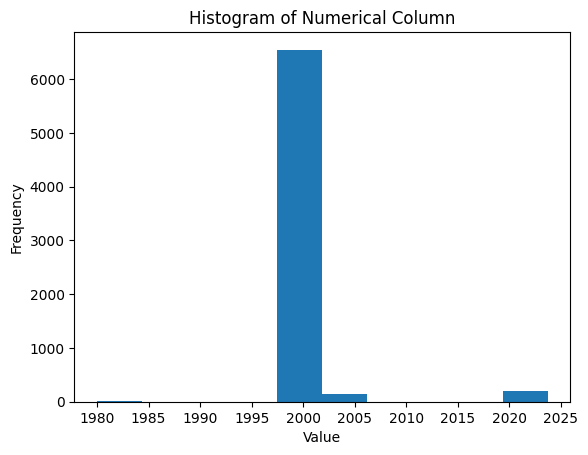

In [52]:
# Create histograms, bar plots, scatter plots, box plots, etc.
plt.hist(david_df['Date'], bins=10)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Numerical Column')
plt.show()


Interesting: the column Date shows that the emails taken for the present study is centred between 2000-2005, and 2020-2023.

let us look at some features.

In [53]:
df=david_df

In [80]:
df.columns

Index(['To_list', 'From_list', 'Date_list', 'subject_list', 'Title', 'Label',
       'file', 'From', 'To', 'Date', 'Subject', 'email_date', 'sender_domain',
       'subject_length', 'Word_Count'],
      dtype='object')

In [54]:
# Assuming 'Date_list' is in a string format
df['Date_list'] = pd.to_datetime(df['Date_list'])

# Now you can use the .dt accessor to extract date components
df['email_date'] = df['Date_list'].dt.date


In [55]:
# Extract features

In [56]:
df['sender_domain'] = df['From_list'].str.split('@').str[1]
df['email_date'] = df['Date_list'].dt.date
df['subject_length'] = df['subject_list'].apply(len)

In [57]:
df['sender_domain']

0       smartcontinental.com
1                   erac.com
2       smartcontinental.com
3       smartcontinental.com
4                   erac.com
                ...         
6888    smartcontinental.com
6889    smartcontinental.com
6890    smartcontinental.com
6891    smartcontinental.com
6892    smartcontinental.com
Name: sender_domain, Length: 6893, dtype: object

In [58]:
df_domain=df['sender_domain'].unique()

In [59]:
df_domain

array(['smartcontinental.com', 'erac.com', 'crmems.com', nan,
       'southwestern.edu', 'wcnet.net', 'gtlaw.com', 'amazon.com',
       'kslaw.com', 'brunini.com', 'jonesday.com', 'yahoo.com',
       'leggefarrow.com', 'deltapower.com', 'bracepatt.com', 'ensr.com',
       'winston.com', 'paulhastings.com', 'akllp.com', 'ss.ps.ge.com',
       'ssmb.com', 'tecoenergy.com', 'ps.ge.com', 'andrews-kurth.com',
       'pagenetmessage.net', 'disc-passport.com', 'kilstock.com',
       'piperrudnick.com', 'bek.com', 'watervalley.net', 'brfg.com',
       'ae.ge.com', 'internetex.com', 'llgm.com', 'bingham.com',
       'pecorp.com', 'dell.com', 'cmates.com', 'fce.com', 'ssfrancis.org',
       'ntls1.digitalriver.com', 'rc.com', 'newmn-r1.blue.aol.com',
       'us.abb.com', 'freshfields.com', 'televisa.com.mx',
       'verticalnet.com', 'milbank.com', 'example.org',
       'conti_job_portal.com', 'example.com', 'example.net'], dtype=object)

In [60]:
domain_counts = df['sender_domain'].value_counts()

In [61]:
domain_counts

smartcontinental.com      6436
conti_job_portal.com        88
kslaw.com                   77
akllp.com                   42
example.net                 40
example.org                 36
example.com                 35
bracepatt.com               16
erac.com                    15
brunini.com                 11
andrews-kurth.com            8
jonesday.com                 6
ae.ge.com                    6
ps.ge.com                    6
watervalley.net              5
ss.ps.ge.com                 4
piperrudnick.com             4
kilstock.com                 4
paulhastings.com             4
gtlaw.com                    3
freshfields.com              3
bek.com                      3
llgm.com                     3
internetex.com               2
wcnet.net                    2
crmems.com                   2
yahoo.com                    2
us.abb.com                   2
fce.com                      2
cmates.com                   2
southwestern.edu             2
amazon.com                   2
leggefar

Interesting fact:
Most of the emails come from the same company (i.e internal), few come from outside (external).

In [62]:
df['subject_length']

0        197
1       1492
2        244
3         95
4        153
        ... 
6888     465
6889     104
6890     132
6891    1433
6892    2057
Name: subject_length, Length: 6893, dtype: int64

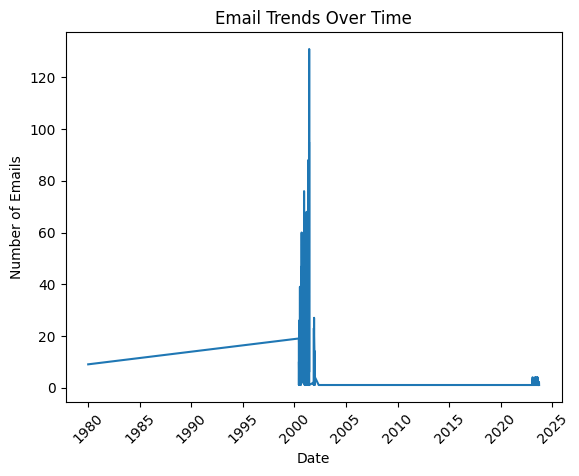

In [63]:
#Email Trends Over Time:
# Group by date and count emails
email_trends = df.groupby('email_date').size()

# Plot email trends
plt.plot(email_trends.index, email_trends.values)
plt.xlabel('Date')
plt.ylabel('Number of Emails')
plt.title('Email Trends Over Time')
plt.xticks(rotation=45)
plt.show()


In [67]:
#Sender and Receiver Analysis:

# Most frequent senders and receivers
top_senders = df['From_list'].value_counts().head(10)
top_receivers = df['To_list'].value_counts().head(10)

# Visualize sender and receiver distributions

In [65]:
top_senders

david.woon@smartcontinental.com           5723
Vincent.Wong@smartcontinental.com          137
Shravan.Kumar@smartcontinental.com         108
suzanne.adams@smartcontinental.com          55
ben.jacoby@smartcontinental.com             47
ccampbell@kslaw.com                         44
kathleen.carnahan@smartcontinental.com      42
eagan.rorschach@smartcontinental.com        40
peterthompson@akllp.com                     23
gregg.penman@smartcontinental.com           22
Name: From_list, dtype: int64

In [66]:
top_receivers

david.woon@smartcontinental.com           1214
suzanne.adams@smartcontinental.com         521
ndavid@erac.com                            329
kathleen.carnahan@smartcontinental.com     253
carlos.sole@smartcontinental.com           210
ben.jacoby@smartcontinental.com            194
sheila.tweed@smartcontinental.com          160
ccampbell@kslaw.com                        124
reagan.rorschach@smartcontinental.com      110
pthompson@akllp.com                        103
Name: To_list, dtype: int64

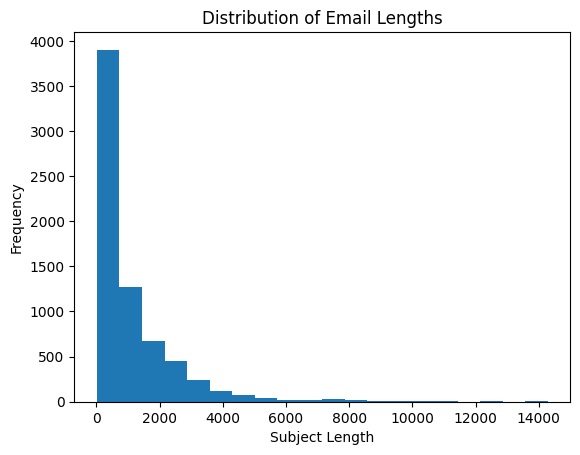

In [68]:
#Subject and Content Analysis:

# Analyze email subject lengths
plt.hist(df['subject_length'], bins=20)
plt.xlabel('Subject Length')
plt.ylabel('Frequency')
plt.title('Distribution of Email Lengths')
plt.show()

# Perform text analysis on email body if available (e.g., sentiment analysis, word clouds)


In [69]:
#Email Categories or Labels:

# Analyze the distribution of emails across categories
category_counts = df['Label'].value_counts()
category_counts

Sent                      3409
required_response         2916
Job_Seeker                 199
time_waste                 124
required_response_BOSS     121
required_response_SUB      106
time_waste_BOSS             15
Sent_SUB                     2
Sent_BOSS                    1
Name: Label, dtype: int64

In [70]:
# Compute the word count for the 'Title' column
df['Word_Count'] = features_df['Title'].apply(lambda x: len(str(x).split()))

In [71]:
df['Word_Count']

0        2
1       11
2        1
3        9
4        1
        ..
6888     3
6889     1
6890     2
6891     5
6892     2
Name: Word_Count, Length: 6893, dtype: int64

Page Rank

To use the PageRank algorithm for an email DataFrame, we need to represent our email data as a graph where nodes represent email addresses, and edges represent the flow of emails from one address to another. we can then apply the PageRank algorithm to calculate the importance scores of each email address in the network.

In [72]:
#network-ranking tool (based on Time response)

In [75]:
# Define a custom time response function (you can adjust this function as needed)
def custom_time_response(date_received, from_address, to_address, subject):
    # Example: Assign a weight based on the inverse of the time difference in days and subject importance
    # This is just a simplified example;
    current_time = pd.Timestamp.now()
    date_received = pd.to_datetime(date_received)  # Convert 'Date' to Timestamp
    time_difference = (current_time - date_received).days

    # Convert 'from_address', 'to_address', and 'subject' to strings
    from_address = str(from_address)
    to_address = str(to_address)
    subject = str(subject)

    # Calculate weight based on custom time response function
    # You can use 'from_address', 'to_address', and 'subject' as needed
    weight = 1.0 / (1.0 + time_difference)

    return weight  # Adjust this function as per your requirements

def generate_graph(david_df):
    # Combine 'From' and 'To' DataFrames to create a list of all email addresses
    email_addresses = pd.concat([david_df['From'], david_df['To']]).unique()

    # Step 1: Create a weighted directed graph
    G = nx.DiGraph()

    # Iterate through the DataFrame and add edges with weights
    for _, row in david_df.iterrows():
        sender = row['From']
        receiver = row['To']
        date_received = row['Date']  # Assuming 'Date' is the date received or sent
        subject = row['Subject']  # Assuming 'Subject' is the email subject

        # Convert 'sender', 'receiver', 'subject' to strings before processing
        sender = str(sender)
        receiver = str(receiver)
        subject = str(subject)

        # Calculate weight based on custom time response function
        time_response_weight = custom_time_response(date_received, sender, receiver, subject)

        # Check if the edge already exists; if not, add it with the calculated weight
        if G.has_edge(sender, receiver):
            G[sender][receiver]['weight'] += time_response_weight
        else:
            G.add_edge(sender, receiver, weight=time_response_weight)

    return G  # Return the graph G

# Example usage:
# Assuming you have a DataFrame called 'features_df' with columns 'From', 'To', 'Date', and 'Subject'
G = generate_graph(david_df)  # Create the graph
pagerank_scores = nx.pagerank(G, alpha=0.85)  # Calculate PageRank scores

# Extract the PageRank scores as a list (PageRank vector)
email_addresses = G.nodes()
page_rank_vector = [pagerank_scores.get(email_address, 0.0) for email_address in email_addresses]

# Now, page_rank_vector is a list where each element corresponds to the PageRank score of a node (email address) in the graph.
print(page_rank_vector)


[0.25995469069504623, 0.013193870272170569, 0.003716526455121493, 0.0004620274679054851, 0.00193960323374765, 0.0005422244517979695, 0.010276031277272474, 0.008595302114254846, 0.0004620274679054851, 0.020530832160467517, 0.0004620274679054851, 0.0004620274679054851, 0.0004620274679054851, 0.007956782216674476, 0.0004620274679054851, 0.0005021234472574578, 0.0004620274679054851, 0.0005422093800097433, 0.0004620274679054851, 0.0004620274679054851, 0.0004620274679054851, 0.0004620274679054851, 0.0004620274679054851, 0.0004620274679054851, 0.0004620274679054851, 0.0004620274679054851, 0.001909055803492086, 0.000537956731130151, 0.003743722706768604, 0.0005797774367089967, 0.00109261697074718, 0.0010087114009897564, 0.0010775162943378082, 0.006592853059342744, 0.0016859464575998706, 0.0004620274679054851, 0.0004620274679054851, 0.005282663944839329, 0.0005403544973372458, 0.00207999286740267, 0.0009614920931796192, 0.0008138531663939, 0.0012290360756269216, 0.003899659881290554, 0.00107250

In [76]:
# Create a DataFrame to store the PageRank scores and email addresses
df_rankvector = pd.DataFrame({'email_address_before': email_addresses, 'Rank_before': page_rank_vector})

# Optionally, you can sort the DataFrame by 'Rank_before' score in descending order
df_rankvector = df_rankvector.sort_values(by='Rank_before', ascending=False)

# Reset the index for better readability
df_rankvector.reset_index(drop=True, inplace=True)

# Create a new column 'emails_before' and copy the email addresses
df_rankvector['email_address_before'] = df_rankvector['email_address_before']

# Create a DataFrame to store the PageRank scores
df_rankvector['Rank_before'] = page_rank_vector  # Add 'Rank_before' column

# Optionally, you can sort the DataFrame by 'Rank_before' score in descending order
df_rankvector = df_rankvector.sort_values(by='Rank_before', ascending=False)

# Reset the index for better readability
df_rankvector.reset_index(drop=True, inplace=True)


# Optionally, you can sort the DataFrame by 'Rank_before' score in descending order
df_rankvector = df_rankvector.sort_values(by='Rank_before', ascending=False)

# Reset the index for better readability
df_rankvector.reset_index(drop=True, inplace=True)

# Create a new column 'ranking_before' with ranking numbers
df_rankvector['ranking_before'] = range(1, len(df_rankvector) + 1)

In [77]:
df_rankvector.head(5)

email_address_before  Rank_before  ranking_before
0     david.woon@smartcontinental.com     0.259955               1
1                 pthompson@akllp.com     0.020531               2
2  suzanne.adams@smartcontinental.com     0.013194               3
3   sheila.tweed@smartcontinental.com     0.010276               4
4                 ccampbell@kslaw.com     0.008595               5

customized Ranking of Emails for Dr. David Woon

Improving scoring or reordering email scoring after discussing with the stakeholder (David Woon). A new urgency list was introduced which are keywords that the stakeholder thinks are important. The weightage is higher if the 'Subject' contains these words.  

In [82]:
# Define the urgency list
urgency_list = ['soon', 'shortly', 'urgent', 'pressing', 'speedy', 'prompt', 'straightaway', 'fast', 'promptly', 'quick', 'immediate', 'quickly', 'agile', 'ready', 'Vincent', 'vincent']

# Define the check_corpus function to count occurrences of urgency keywords
def check_corpus(df):
    total_count = 0
    for word in urgency_list:
        temp_df = df['Text'].str.contains(word, na=False, case=False)  # Ignore case
        total_count += temp_df.sum()
    return total_count

# Define a custom time response function
def custom_time_response(date_received, title):
    # Example: Assign a weight based on the inverse of the time difference in days and subject importance
    # This is just a simplified example;
    current_time = pd.Timestamp.now()
    date_received = pd.to_datetime(date_received)  # Convert 'Date' to Timestamp
    time_difference = (current_time - date_received).days

    # Convert 'title' to a string and calculate subject importance
    title = str(title)
    subject_importance = len(title.split())  # Count of words in the subject

    return 1.0 / (1.0 + time_difference) * subject_importance  # Adjust this function as per your requirements

def generate_graph(david_df):
    # Combine 'From', 'Subject', and 'Title' into a single 'Text' column
    david_df['Text'] = david_df['From'].astype(str) + ' ' + david_df['Subject'].astype(str) + ' ' + david_df['Title'].astype(str)

    # Convert the 'Date' column to datetime
    david_df['Date'] = pd.to_datetime(david_df['Date'])

    # Ensure 'Text' column is treated as a string
    david_df['Text'] = david_df['Text'].astype(str)

    # Combine 'From' and 'To' DataFrames to create a list of all email addresses
    email_addresses = pd.concat([david_df['From'], david_df['To']]).unique()

    # Step 1: Create a weighted directed graph
    G = nx.DiGraph()

    # Iterate through the DataFrame and add edges with weights
    for _, row in david_df.iterrows():
        sender = row['From']
        receiver = row['To']
        date_received = row['Date']  # Assuming 'Date' is the date received or sent
        text = row['Text']  # Combined text from 'From', 'Subject', and 'Title' columns

        # Calculate the weight based on the frequency of urgency keywords
        weight = 1.0  # Default weight

        # Count the occurrences of urgency keywords in the text
        urgency_count = check_corpus(pd.DataFrame({'Text': [text]}))

        # Add weight based on urgency keyword frequency (you can adjust the weight multiplier as needed)
        weight += urgency_count  # Adjust this multiplier as per your requirements

        # Calculate weight based on custom time response function
        time_response_weight = custom_time_response(date_received, text)
        weight *= time_response_weight

        # Check if the edge already exists; if not, add it with the calculated weight
        if G.has_edge(sender, receiver):
            G[sender][receiver]['weight'] += weight
        else:
            G.add_edge(sender, receiver, weight=weight)

    # Step 2: Apply PageRank Algorithm
    pagerank_scores = nx.pagerank(G, alpha=0.85)

    return pagerank_scores

# Example usage:
# 1
pagerank_scores = generate_graph(david_df)
email_address = 'Vincent.Wong@smartcontinental.com'
score = pagerank_scores.get(email_address, 0.0)  # Default to 0 if the email address is not in the graph

print(f"PageRank score for {email_address}: {score}")



PageRank score for Vincent.Wong@smartcontinental.com: 0.0004512073958272179


In [84]:
# 2
pagerank_scores = generate_graph(david_df)
email_address = 'david.woon@smartcontinental.com'
score = pagerank_scores.get(email_address, 0.0)  # Default to 0 if the email address is not in the graph

print(f"PageRank score for {email_address}: {score}")

PageRank score for david.woon@smartcontinental.com: 0.2659196300601406


In [85]:
# Extract the PageRank scores as a list (PageRank vector)
email_addresses = G.nodes()
page_rank_vector = [pagerank_scores.get(email_address, 0.0) for email_address in email_addresses]

# Now, page_rank_vector is a list where each element corresponds to the PageRank score of a node (email address) in the graph.
print(page_rank_vector)

[0.2659196300601406, 0.012691620401775655, 0.0035760218748410615, 0.0004512073958272179, 0.001008386075452158, 0.0004578763727992513, 0.011587690981543447, 0.013544015854134698, 0.0004512073958272179, 0.01053296533035913, 0.0004512073958272179, 0.0004512073958272179, 0.0004512073958272179, 0.00847250613578359, 0.0004512073958272179, 0.00045318999078531355, 0.0004512073958272179, 0.0004969838835640374, 0.0004512073958272179, 0.0004512073958272179, 0.0004512073958272179, 0.0004512073958272179, 0.0004512073958272179, 0.0004512073958272179, 0.0004512073958272179, 0.0004512073958272179, 0.0016199094957709804, 0.0006894421376055075, 0.00523888766897952, 0.0005216041974874414, 0.0007961637640054638, 0.0008760535658036513, 0.0008890342932275599, 0.005339202689814645, 0.0008517069895519777, 0.0004512073958272179, 0.0004512073958272179, 0.013243786029921956, 0.0006487291818849286, 0.0014056106225364931, 0.0009315205591811591, 0.0011113019394172106, 0.0006838056895475237, 0.003558341998767504, 0.

In [86]:
# Sort nodes by PageRank score in descending order
sorted_nodes = sorted(pagerank_scores.items(), key=lambda x: x[1], reverse=True)

# Assign rankings to all nodes
ranked_nodes = [(node, rank + 1) for rank, (node, _) in enumerate(sorted_nodes)]

# Create a DataFrame for all nodes and their rankings
data = {'email_address': [node for node, _ in ranked_nodes], 'Rank': [rank for _, rank in ranked_nodes]}
df_all = pd.DataFrame(data)

# Display the table
print("\nTable of All Email Addresses and Their Rankings:")
print(df_all)


Table of All Email Addresses and Their Rankings:
                               email_address  Rank
0            david.woon@smartcontinental.com     1
1           carlos.sole@smartcontinental.com     2
2                        ccampbell@kslaw.com     3
3                            ndavid@erac.com     4
4     kathleen.carnahan@smartcontinental.com     5
...                                      ...   ...
1124            corey85@conti_job_portal.com  1125
1125                   derrick31@example.com  1126
1126               tannermatthew@example.org  1127
1127                ibarrajoseph@example.com  1128
1128                      wglenn@example.org  1129

[1129 rows x 2 columns]


In [87]:
df_rankvector.columns

Index(['email_address_before', 'Rank_before', 'ranking_before'], dtype='object')

In [88]:
df_all.columns

Index(['email_address', 'Rank'], dtype='object')

In [89]:
df_rankvector[['email_address', 'Rank']] = df_all[['email_address', 'Rank']]

In [90]:
df_rankvector.columns

Index(['email_address_before', 'Rank_before', 'ranking_before',
       'email_address', 'Rank'],
      dtype='object')

In [91]:
df_rankvector[['email_address_before', 'ranking_before',
       'email_address', 'Rank']]

email_address_before  ranking_before  \
0           david.woon@smartcontinental.com               1   
1                       pthompson@akllp.com               2   
2        suzanne.adams@smartcontinental.com               3   
3         sheila.tweed@smartcontinental.com               4   
4                       ccampbell@kslaw.com               5   
...                                     ...             ...   
1124                 drhunt@watervalley.net            1125   
1125       fred.mitro@smartcontinental.com,            1126   
1126   pthompson@akllp.com, ccobb@akllp.com            1127   
1127                   lee.johnson@ss.ps.ge            1128   
1128  genia.fitzgerald@smartcontinental.com            1129   

                               email_address  Rank  
0            david.woon@smartcontinental.com     1  
1           carlos.sole@smartcontinental.com     2  
2                        ccampbell@kslaw.com     3  
3                            ndavid@erac.com     4  
4     kathleen.carnahan@smartcontinental.com     5  
...                                      ...   ...  
1124            corey85@conti_job_portal.com  1125  
1125                   derrick31@example.com  1126  
1126               tannermatthew@example.org  1127  
1127                ibarrajoseph@example.com  1128  
1128                      wglenn@example.org  1129  

[1129 rows x 4 columns]

In [92]:
df=df_rankvector[['email_address_before', 'ranking_before',
       'email_address', 'Rank']]

<ipython-input-93-a154b679628d>:21: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


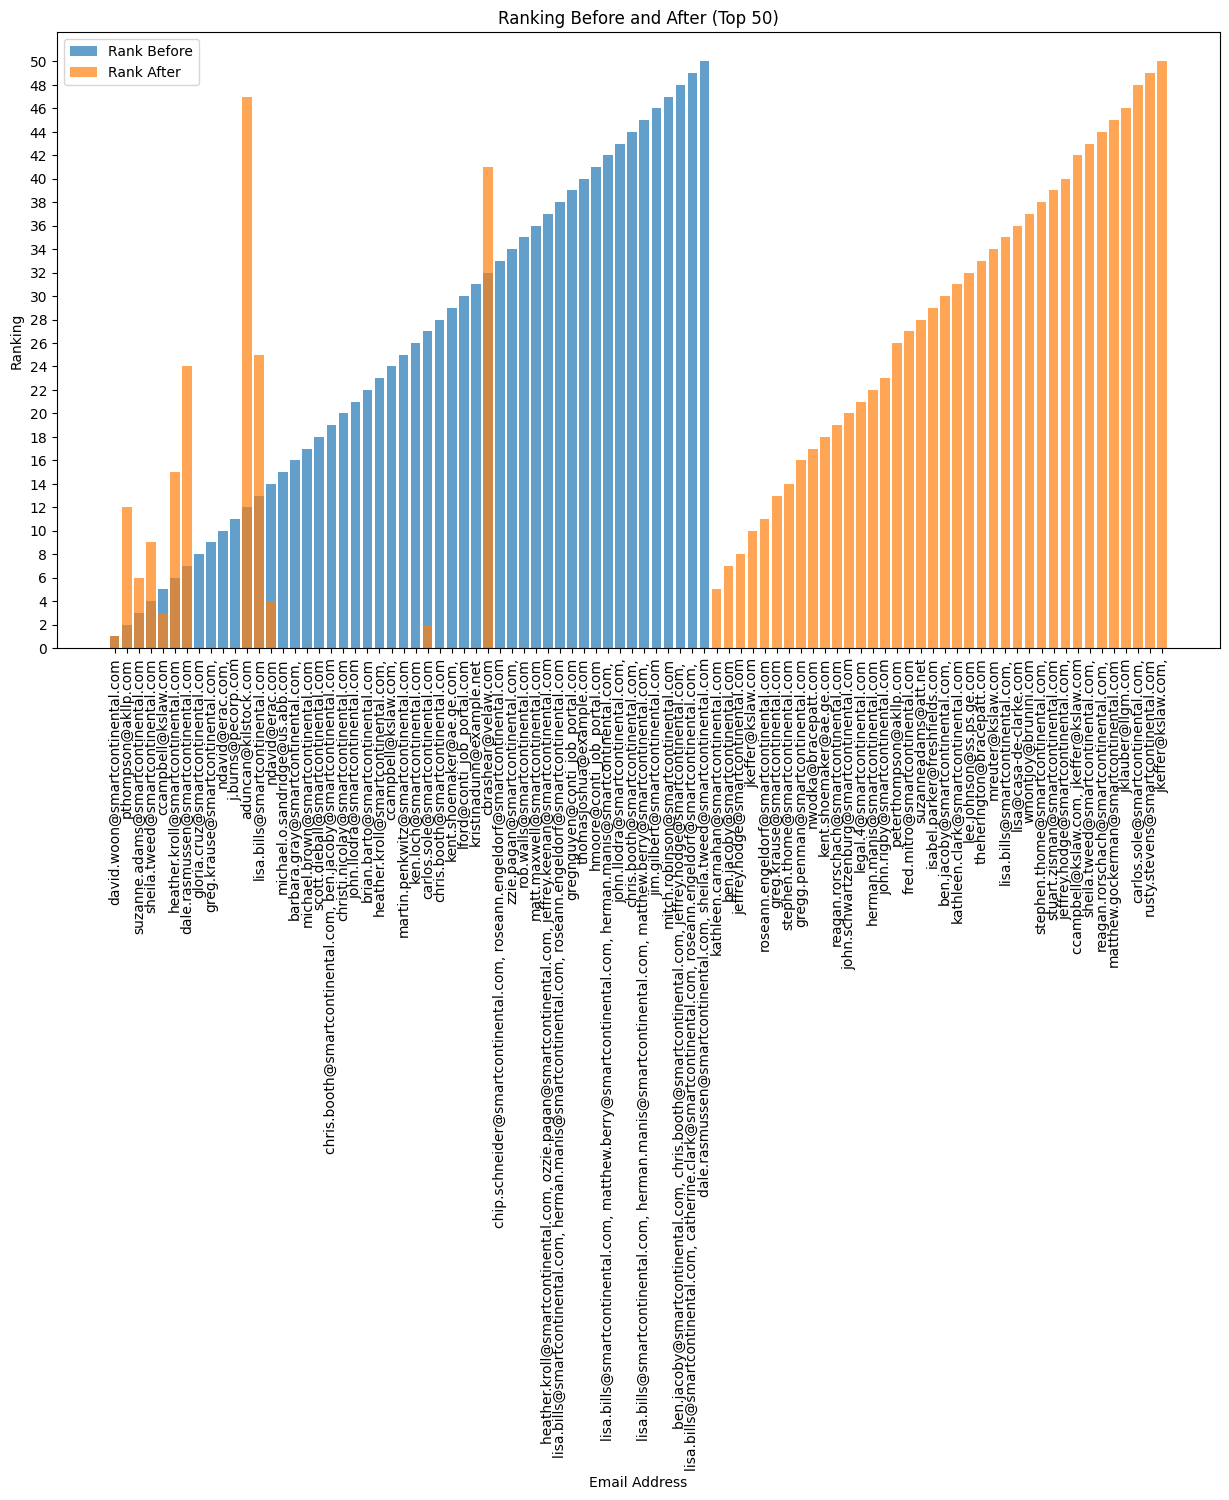

In [93]:
# Limit the DataFrame to the top 50 observations
df_top_50 = df.head(50)

# Increase the figure size
plt.figure(figsize=(15, 8))

# Plotting
plt.bar(df_top_50['email_address_before'], df_top_50['ranking_before'], label='Rank Before', alpha=0.7)
plt.bar(df_top_50['email_address'], df_top_50['Rank'], label='Rank After', alpha=0.7)
plt.xlabel('Email Address')
plt.ylabel('Ranking')
plt.title('Ranking Before and After (Top 50)')
plt.xticks(rotation=90)
plt.legend()

# Set custom y-axis ticks
custom_ticks = np.arange(0, 51, 2)
plt.yticks(custom_ticks)

# Automatically adjust layout
plt.tight_layout()

# Show the plot
plt.show()

<Figure size 640x480 with 0 Axes>

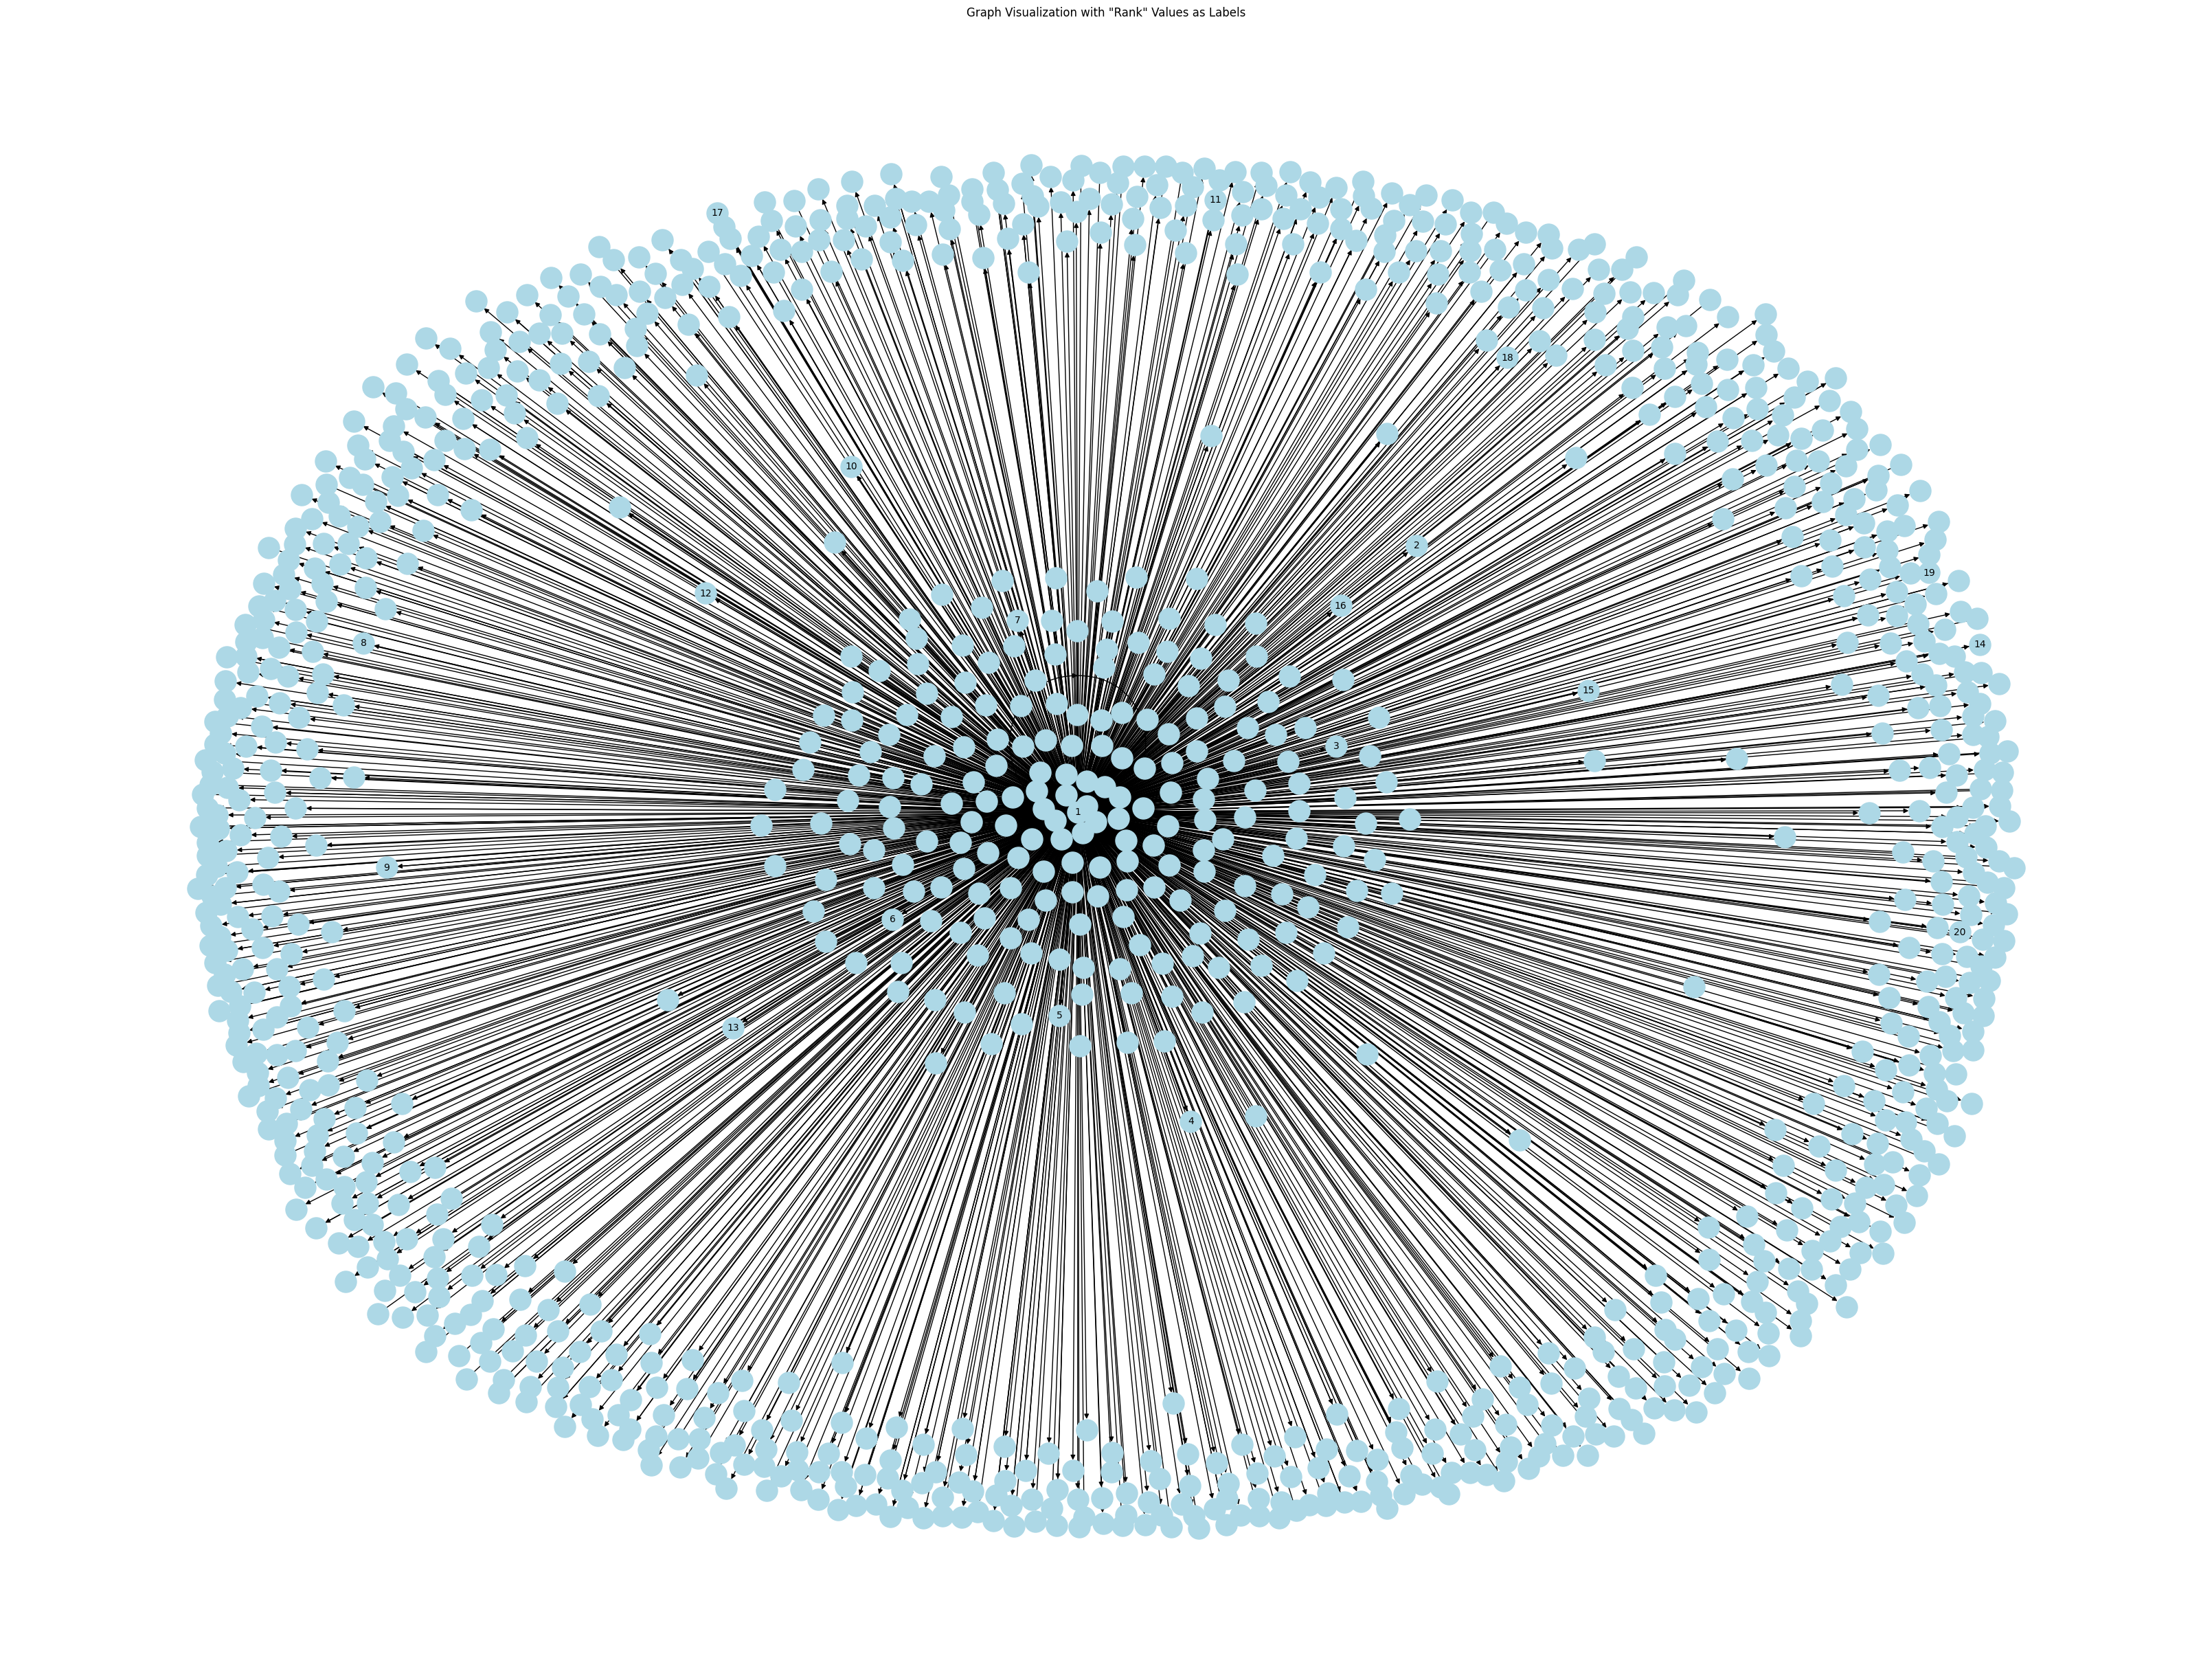

In [94]:
df_top_20 = df.head(20)

# Assuming you have already created the network graph G and loaded df_top_50
# Replace G and df_top_20 with your actual graph and DataFrame

# Create a dictionary to map email addresses to 'Rank' values from df_top_50
email_to_rank = dict(zip(df_top_20['email_address'], df_top_20['Rank']))

# Layout algorithm (you can change this)
pos = nx.spring_layout(G)

# Set the figure size to five times its original size
fig_size_multiplier = 5
fig_width, fig_height = plt.gcf().get_size_inches()
new_fig_width = fig_width * fig_size_multiplier
new_fig_height = fig_height * fig_size_multiplier
plt.figure(figsize=(new_fig_width, new_fig_height))

# Draw the graph with 'Rank' values as node labels
nx.draw(G, pos, labels=email_to_rank, node_size=500, node_color='lightblue', font_size=10, font_color='black')
plt.title('Graph Visualization with "Rank" Values as Labels')

# Save the graph as a PDF
plt.savefig('graph_visualization_with_rank_labels.pdf', format='pdf')

# Show the graph (optional)
plt.show()



In [100]:
def calculate_node_num_dict(david_df):
    # Extract unique 'From' and 'To' values
    from_users = david_df['From_list'].unique()
    to_users = david_df['To_list'].unique()

    # Merge the lists to get all unique users
    all_users = np.concatenate((from_users, to_users), axis=None)

    # Initialize dictionaries and counters
    node_num_dict = {}
    count = 1

    # Create User Dictionary
    for user in all_users:
        if user not in node_num_dict:
            node_num_dict[user] = count
            count += 1

    return node_num_dict

# node_num_dict = calculate_node_num_dict(features_df)


In [101]:
node_num_dict = calculate_node_num_dict(david_df)

In [102]:
import numpy as np
from collections import defaultdict

def calculate_edge_list(david_df, node_num_dict):
    edge_list = []

    for i in range(len(david_df)):
        from_user = david_df.iloc[i]['From_list']
        to_user = david_df.iloc[i]['To_list']

        # Check if both 'From' and 'To' users are in the node_num_dict
        if from_user in node_num_dict and to_user in node_num_dict:
            edge_list.append((node_num_dict[from_user], node_num_dict[to_user]))

    return edge_list

In [103]:
edge_list= calculate_edge_list(david_df, node_num_dict)

In [104]:
import numpy as np
from collections import defaultdict

def calculate_weight_dict(david_df, node_num_dict):
    weight_dict = {}

    for i in range(len(david_df)):
        from_user = david_df.iloc[i]['From_list']
        to_user = david_df.iloc[i]['To_list']

        # Check if both 'From' and 'To' users are in the node_num_dict
        if from_user in node_num_dict and to_user in node_num_dict:
            from_node = node_num_dict[from_user]
            to_node = node_num_dict[to_user]

            edge_df = david_df[(david_df['From'] == from_user) & (david_df['To'] == to_user)]
            temp_count = edge_df['From'].count()

            if temp_count != 0:
                weight_dict[(from_node, to_node)] = temp_count

            reverse_edge_df = david_df[(david_df['From'] == to_user) & (david_df['To'] == from_user)]
            temp_reverse_count = reverse_edge_df['From'].count()

            if temp_reverse_count != 0:
                weight_dict[(to_node, from_node)] = temp_reverse_count

    return weight_dict

In [105]:
weight_dict =  calculate_weight_dict(david_df, node_num_dict)

In [106]:
def generate_graph(rank_matrix, edge_list, node_num, weighted_vector, node_num_dict):
  dot = Digraph(comment='The Round Table')
  for edge in edge_list:
    dot.edge(str(reverse_node_num[edge[0]]),str(reverse_node_num[edge[1]]))
  dot.render('round-table.gv', view=True)

reverse_node_num = {}
for node in node_num_dict:
  reverse_node_num[node_num_dict[node]] = node
generate_graph(page_rank_vector, edge_list, 101, weight_dict, reverse_node_num)


In [107]:
# response

In [109]:
david_df['Label'].unique()

array(['time_waste', 'time_waste_BOSS', 'Sent', 'Sent_SUB', 'Sent_BOSS',
       'required_response_SUB', 'required_response',
       'required_response_BOSS', 'Job_Seeker'], dtype=object)

In [110]:
print(david_df.shape)
print("The Label Distribution for the Email dataset:\n", features_df['Label'].value_counts())

(6893, 16)
The Label Distribution for the Email dataset:
 required_response         3768
Sent                      3401
required_response_BOSS     650
Sent_BOSS                  574
required_response_SUB      539
Sent_SUB                   460
Job_Seeker                 199
time_waste                 152
time_waste_BOSS             27
Name: Label, dtype: int64


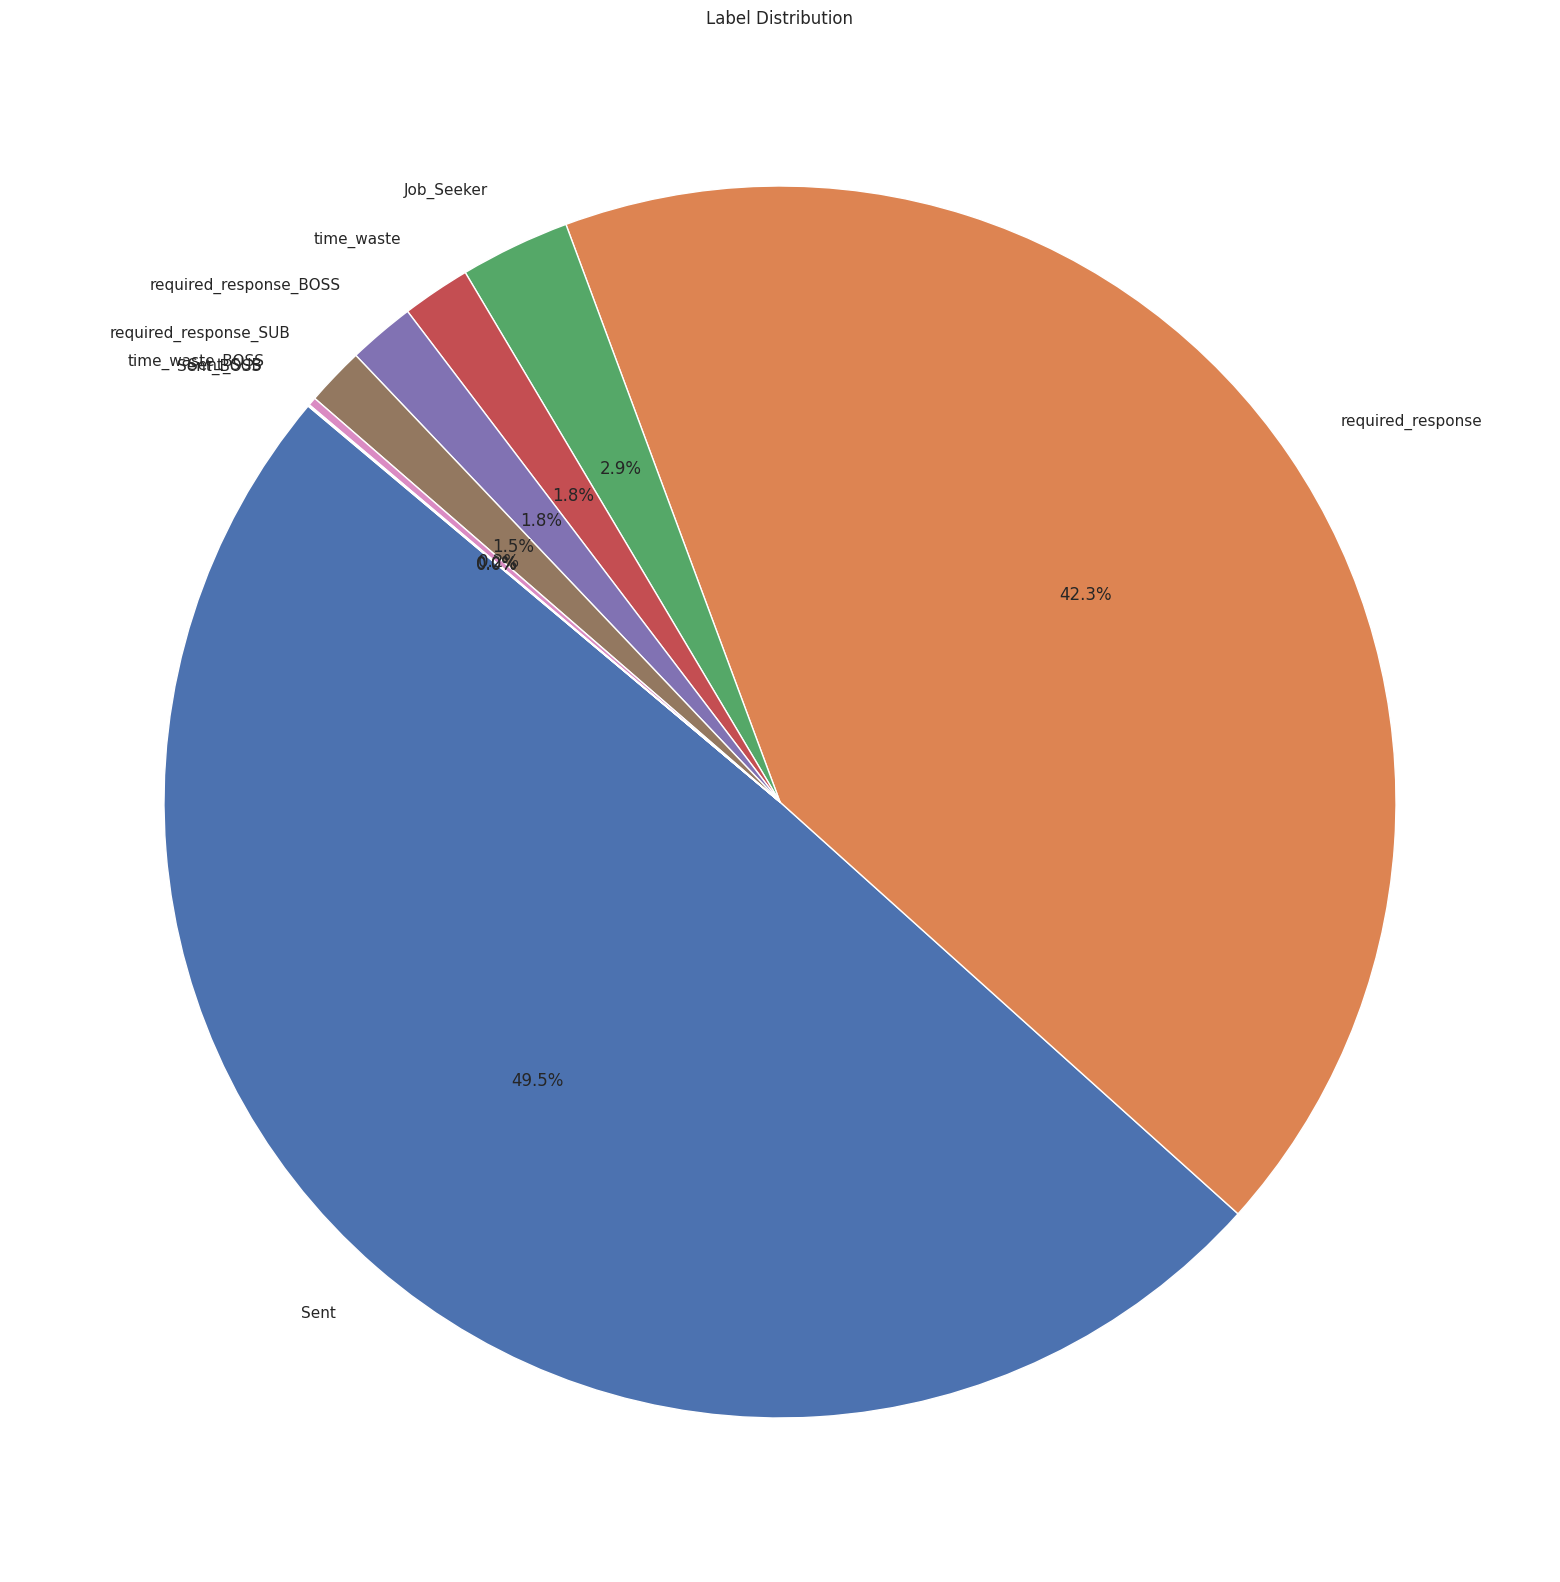

In [119]:
# Create a pie chart
label_counts = david_df['Label'].value_counts()
plt.figure(figsize=(20, 20))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Label Distribution")
plt.show()


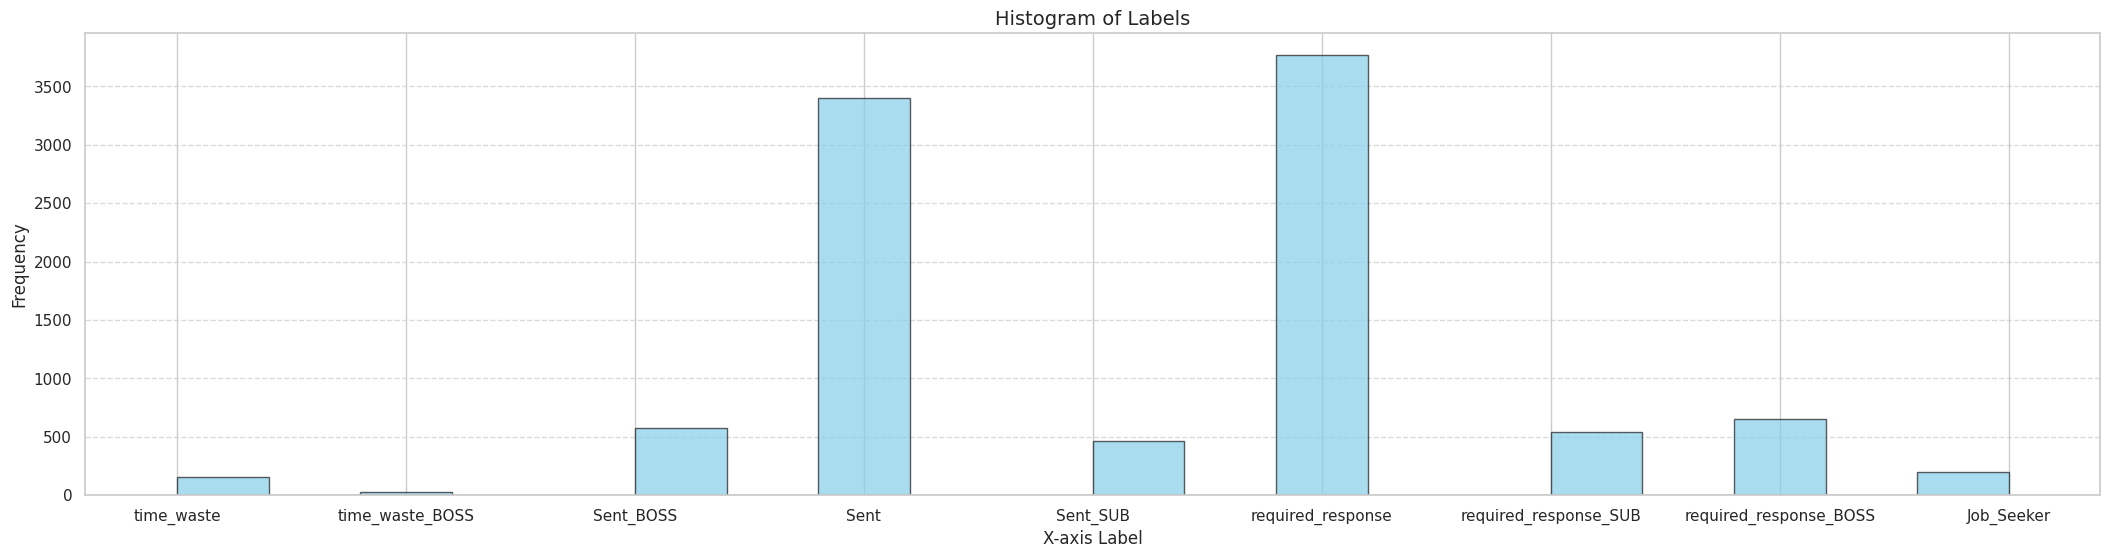

In [116]:
# Set the style for the plot
sns.set(style='whitegrid')

# Create a histogram plot for a specific column (e.g., 'Label')
plt.figure(figsize=(26, 6))  # Adjust the figsize as needed

# Customize the histogram appearance
plt.hist(features_df['Label'], bins=20, edgecolor='k', color='skyblue', alpha=0.7)  # Adjust color and transparency

# Add labels and title
plt.xlabel('X-axis Label', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Histogram of Labels', fontsize=14)

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


In [120]:
email_df=david_df

In [121]:
email_df.shape

(6893, 16)

Modelling

Preprocessing:
Removing punctutations

Stemming using porter stemmer

In [122]:

# Perform text Preprocessing - Stemming using Porter Stemmer
preprocessed_Subject, preprocessed_content = [], []

for index, row in email_df.iterrows():
    stem_sub, stem_cont = [], []

    if(not pd.isnull(row['subject_list'])):
      # Removing punctuations from the sentence
      sentence = re.sub(r'[^0-9A-Za-z]+', ' ', row['subject_list'])
      for word in word_tokenize(sentence):
          # Replace the word with stem word
          stem_word = PorterStemmer().stem(word)
          stem_cont.append(stem_word)
    else:
      stem_cont.append(' ')

    if(not pd.isnull(row['Title'])):
      # Removing punctuations from the sentence
      sentence = re.sub(r'[^0-9A-Za-z]+', ' ', row['Title'])
      for word in word_tokenize(sentence):
          # Replace the word with stem word
          stem_word = PorterStemmer().stem(word)
          stem_sub.append(stem_word)
      else:
        stem_sub.append(' ')

    preprocessed_Subject.append(' '.join([word for word in stem_sub]))
    preprocessed_content.append(' '.join([word for word in stem_cont]))


email_df['processed_subject'] = preprocessed_Subject
email_df['processed_content'] = preprocessed_content
print(email_df.shape)
print(email_df.columns)

(6893, 18)
Index(['To_list', 'From_list', 'Date_list', 'subject_list', 'Title', 'Label',
       'file', 'From', 'To', 'Date', 'Subject', 'email_date', 'sender_domain',
       'subject_length', 'Word_Count', 'Text', 'processed_subject',
       'processed_content'],
      dtype='object')


POS tagging

Generate POS tags for the email Subject(preprocessed) and generate sentence with tags in "word/POStag" format.

Generate POS tags for the email Content(preprocessed) and generate sentence with tags in "word/POStag" format.

In [123]:

# Method to compute the POS tags for an input column

def generatePOS(sentence_list):
  sentlist_posTagged = []

  for sentence in sentence_list:
    word_tokens = nltk.word_tokenize(sentence)
    # Get the POS tags for the word tokens
    POS_word_tokens = nltk.pos_tag(word_tokens)

    # Concatenate word/pos_tag format
    sent_posTagged = ' '.join([entity[0]+"/"+entity[1] for entity in POS_word_tokens])
    sentlist_posTagged.append(sent_posTagged)

  return pd.DataFrame(sentlist_posTagged)

  # Store the POS tagged Subject and Content into the dataframe

email_df['SubjectPOS'] = generatePOS(email_df['processed_subject'])
email_df['ContentPOS'] = generatePOS(email_df['processed_content'])

print(email_df.shape)
print(email_df.columns)

(6893, 20)
Index(['To_list', 'From_list', 'Date_list', 'subject_list', 'Title', 'Label',
       'file', 'From', 'To', 'Date', 'Subject', 'email_date', 'sender_domain',
       'subject_length', 'Word_Count', 'Text', 'processed_subject',
       'processed_content', 'SubjectPOS', 'ContentPOS'],
      dtype='object')


In [143]:
# Filter the DataFrame to keep only classes with at least 200 instances
min_class_count = 200
filtered_email_df = email_df.groupby('Label').filter(lambda x: len(x) >= min_class_count)

# Save the filtered DataFrame as 'email_dfr'
filtered_email_df.to_csv('email_dfr.csv', index=False)

# Verify the class counts in the filtered DataFrame
print(filtered_email_df['Label'].value_counts())


Sent                 3409
required_response    2916
Name: Label, dtype: int64


In [144]:
filtered_email_df.columns

Index(['To_list', 'From_list', 'Date_list', 'subject_list', 'Title', 'Label',
       'file', 'From', 'To', 'Date', 'Subject', 'email_date', 'sender_domain',
       'subject_length', 'Word_Count', 'Text', 'processed_subject',
       'processed_content', 'SubjectPOS', 'ContentPOS', 'Merged_email'],
      dtype='object')

In [145]:

# Split the sentences into training and validation by stratifying the samples.
filtered_email_df['SubjectPOS'] = [''.join([word for word in subject]) for subject in filtered_email_df['SubjectPOS']]
filtered_email_df['ContentPOS'] = [''.join([word for word in content]) for content in filtered_email_df['ContentPOS']]

filtered_email_df['Merged_email'] = filtered_email_df[['To_list','From_list','Date_list','SubjectPOS','ContentPOS']].apply(lambda x: ' '.join(x.dropna().astype(str)),axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(filtered_email_df['Merged_email'], filtered_email_df['Label'], test_size=0.25, shuffle = True, stratify = filtered_email_df['Label'], random_state=0)
#print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)
print("The Label Distribution for the Training dataset:\n", Y_train.value_counts())

# Step 1 - Generate the token matrix
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
X_test_counts = count_vect.transform(X_test)

# Step 2 - Transform the count matrix to TF-IDF
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)

#print(X_train_tfidf.shape, X_test_tfidf.shape,Y_train.shape, Y_test.shape)

The Label Distribution for the Training dataset:
 Sent                 2556
required_response    2187
Name: Label, dtype: int64


Model 2 - Tf-Idf (Term frequency - Inverse Document frequency)

Step 1 - Convert the collection of email corpus to matrix of token counts using Count Vectorizer

Step 2 - Transform the count matrix into normalized TF or TF-IDF form.

Step 3 - Train and test using the classifier for each sentence

In [147]:
# Step 1 - Generate the token matrix
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
X_test_counts = count_vect.transform(X_test)

# Step 2 - Transform the count matrix to TF-IDF
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)

print(X_train_tfidf.shape, X_test_tfidf.shape,Y_train.shape, Y_test.shape)

# Fit the model for the classifier
clf = MultinomialNB().fit(X_train_tfidf, Y_train)

# Predicting the class labels for Test data
Y_test_pred = clf.predict(X_test_tfidf)

print('Classification Model 2 - K- Neighbors classifier Classifier Tf-Idf TEST metrics:\nAccuracy -',round(accuracy_score(Y_test,Y_test_pred),4))
print('f1 score -', round(f1_score(Y_test,Y_test_pred,labels=None, pos_label=1, average='weighted'),4))
print('Classification Report:\n',classification_report(Y_test, Y_test_pred))

(4743, 16707) (1582, 16707) (4743,) (1582,)
Classification Model 2 - K- Neighbors classifier Classifier Tf-Idf TEST metrics:
Accuracy - 0.543
f1 score - 0.4312
Classification Report:
                    precision    recall  f1-score   support

             Sent       0.54      0.94      0.69       853
required_response       0.53      0.07      0.13       729

         accuracy                           0.54      1582
        macro avg       0.54      0.51      0.41      1582
     weighted avg       0.54      0.54      0.43      1582



#SVM classifier for TF-IDF transformed data and evaluate its performance

In [ ]:
#model next

In [148]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Create an SVM classifier
svm_classifier = SVC(kernel='linear', C=1.0, probability=True, random_state=0)

# Fit the SVM classifier to the training data
svm_classifier.fit(X_train_tfidf, Y_train)

# Predicting the class labels for the test data
Y_test_pred_svm = svm_classifier.predict(X_test_tfidf)

# Evaluate the SVM classifier
accuracy_svm = accuracy_score(Y_test, Y_test_pred_svm)
f1_score_svm = f1_score(Y_test, Y_test_pred_svm, labels=None, pos_label=1, average='weighted')
classification_report_svm = classification_report(Y_test, Y_test_pred_svm)

# Print the evaluation metrics
print('SVM Classifier Tf-Idf TEST metrics:')
print('Accuracy -', round(accuracy_svm, 4))
print('F1 score -', round(f1_score_svm, 4))
print('Classification Report:\n', classification_report_svm)


SVM Classifier Tf-Idf TEST metrics:
Accuracy - 0.5544
F1 score - 0.5484
Classification Report:
                    precision    recall  f1-score   support

             Sent       0.58      0.66      0.62       853
required_response       0.52      0.43      0.47       729

         accuracy                           0.55      1582
        macro avg       0.55      0.55      0.54      1582
     weighted avg       0.55      0.55      0.55      1582



#Neural Network (Deep Learning):
For text classification with a neural network, you can use libraries like TensorFlow or Keras. Here's a simple example using Keras with a feedforward neural network:

In [150]:
pip install np_utils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 651.9 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for np_utils: filename=np_utils-0.6.0-py3-none-any.whl size=56438 sha256=0968e5e10ad97c8ffb141479b928e8bfe37a66268bb08b43f7806cb867095414
  Stored in directory: /root/.cache/pip/wheels/b6/c7/50/2307607f44366dd021209f660045f8d51cb976514d30be7cc7
Successfully built np_utils


In [152]:
pip install keras.utils

  Preparing metadata (setup.py) ... done
  Created wheel for keras.utils: filename=keras_utils-1.0.13-py3-none-any.whl size=2632 sha256=ceade526d643a89cb0fa42de4d6219a3339b5d106306d8f81f003ca6b3bf496d
  Stored in directory: /root/.cache/pip/wheels/5c/c0/b3/0c332de4fd71f3733ea6d61697464b7ae4b2b5ff0300e6ca7a
Successfully built keras.utils


In [156]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

# Split the data into training and validation sets
X_train_nn, X_val_nn, Y_train_nn, Y_val_nn = train_test_split(
    X_train_tfidf, Y_train_onehot, test_size=0.1, random_state=42
)

# Create a simple feedforward neural network model
model = Sequential()
model.add(Dense(128, input_dim=X_train_nn.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model to the training data
model.fit(X_train_nn, Y_train_nn, epochs=10, batch_size=32, validation_data=(X_val_nn, Y_val_nn))

# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test_tfidf, Y_test_onehot)
print('Neural Network Test Loss:', loss)
print('Neural Network Test Accuracy:', accuracy)


Epoch 1/10
134/134 [==============================] - 4s 19ms/step - loss: 0.6885 - accuracy: 0.5401 - val_loss: 0.6872 - val_accuracy: 0.5221
Epoch 2/10
134/134 [==============================] - 2s 17ms/step - loss: 0.6554 - accuracy: 0.6099 - val_loss: 0.7125 - val_accuracy: 0.5137
Epoch 3/10
134/134 [==============================] - 2s 16ms/step - loss: 0.5943 - accuracy: 0.6621 - val_loss: 0.7850 - val_accuracy: 0.4842
Epoch 4/10
134/134 [==============================] - 2s 18ms/step - loss: 0.5460 - accuracy: 0.7113 - val_loss: 0.8479 - val_accuracy: 0.4758
Epoch 5/10
134/134 [==============================] - 3s 19ms/step - loss: 0.5062 - accuracy: 0.7357 - val_loss: 0.9242 - val_accuracy: 0.4716
Epoch 6/10
134/134 [==============================] - 2s 17ms/step - loss: 0.4810 - accuracy: 0.7493 - val_loss: 1.0162 - val_accuracy: 0.4716
Epoch 7/10
134/134 [==============================] - 2s 16ms/step - loss: 0.4596 - accuracy: 0.7528 - val_loss: 1.0709 - val_accuracy: 0.4568

In [158]:
from sklearn.metrics import classification_report

# Predict class probabilities for the test data
Y_test_probs = model.predict(X_test_tfidf)

# Convert class probabilities to class labels
Y_test_pred = [label_encoder.classes_[i] for i in Y_test_probs.argmax(axis=1)]

# Generate the classification report
classification_report_str = classification_report(Y_test, Y_test_pred)

# Print the classification report
print(classification_report_str)


50/50 [==============================] - 0s 4ms/step
                   precision    recall  f1-score   support

             Sent       0.50      0.50      0.50       853
required_response       0.41      0.41      0.41       729

         accuracy                           0.46      1582
        macro avg       0.45      0.45      0.45      1582
     weighted avg       0.46      0.46      0.46      1582



#Decision Tree

In [160]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier with 100 trees
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=0)

# Fit the classifier to the training data
rf_classifier.fit(X_train_tfidf, Y_train)

# Predicting the class labels for the test data
Y_test_pred_rf = rf_classifier.predict(X_test_tfidf)

# Evaluate the Random Forest classifier
accuracy_rf = accuracy_score(Y_test, Y_test_pred_rf)
f1_score_rf = f1_score(Y_test, Y_test_pred_rf, labels=None, pos_label=1, average='weighted')
classification_report_rf = classification_report(Y_test, Y_test_pred_rf)

# Print the evaluation metrics
print('Random Forest Classifier Tf-Idf TEST metrics:')
print('Accuracy -', round(accuracy_rf, 4))
print('F1 score -', round(f1_score_rf, 4))
print('Classification Report:\n', classification_report_rf)


Random Forest Classifier Tf-Idf TEST metrics:
Accuracy - 0.4064
F1 score - 0.4014
Classification Report:
                    precision    recall  f1-score   support

             Sent       0.45      0.51      0.48       853
required_response       0.33      0.29      0.31       729

         accuracy                           0.41      1582
        macro avg       0.39      0.40      0.39      1582
     weighted avg       0.40      0.41      0.40      1582



#Random Forest (Ensemble Learning):

In [159]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=0)

# Fit the classifier to the training data
rf_classifier.fit(X_train_tfidf, Y_train)

# Predicting the class labels for the test data
Y_test_pred_rf = rf_classifier.predict(X_test_tfidf)

# Evaluate the Random Forest classifier
accuracy_rf = accuracy_score(Y_test, Y_test_pred_rf)
f1_score_rf = f1_score(Y_test, Y_test_pred_rf, labels=None, pos_label=1, average='weighted')
classification_report_rf = classification_report(Y_test, Y_test_pred_rf)

# Print the evaluation metrics
print('Random Forest Classifier Tf-Idf TEST metrics:')
print('Accuracy -', round(accuracy_rf, 4))
print('F1 score -', round(f1_score_rf, 4))
print('Classification Report:\n', classification_report_rf)


Random Forest Classifier Tf-Idf TEST metrics:
Accuracy - 0.4064
F1 score - 0.4014
Classification Report:
                    precision    recall  f1-score   support

             Sent       0.45      0.51      0.48       853
required_response       0.33      0.29      0.31       729

         accuracy                           0.41      1582
        macro avg       0.39      0.40      0.39      1582
     weighted avg       0.40      0.41      0.40      1582

